### Tiền xử lý dữ liệu

#### Xử Lý dữ liệu thô

In [508]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


**Bỏ dữ liệu không liên quan**

In [509]:
df.drop(columns=['Patient ID','Income'], inplace=True)
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,9,6.615001,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,4.963459,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9,9.463426,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,9,7.648981,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,6,1.514821,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,8,10.806373,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,8,3.833038,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,5,2.375214,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,5,0.029104,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


##### Tìm dữ liệu thiếu

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [511]:
df.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

Không có dữ liệu thiếu trong dữ liệu

##### Xử lý dữ liệu hỗn hợp

In [512]:
# Chia cột "Blood Pressure" thành hai cột mới
df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True)

# Chuyển đổi dữ liệu của hai cột mới thành dạng số
df['Systolic Blood Pressure'] = pd.to_numeric(df['Systolic Blood Pressure'], errors='coerce')
df['Diastolic Blood Pressure'] = pd.to_numeric(df['Diastolic Blood Pressure'], errors='coerce')

# Loại bỏ cột gốc "Blood Pressure"
df.drop(columns=['Blood Pressure'], inplace=True)
df


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


##### Rời rạc hóa dữ liệu

Age

<Axes: xlabel='Age', ylabel='Density'>

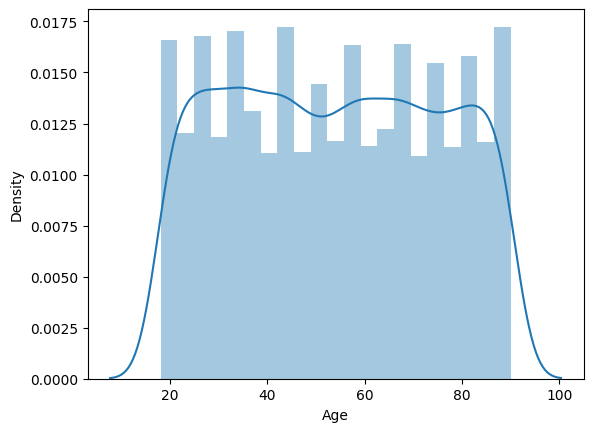

In [513]:
sns.distplot(df['Age'])

In [514]:
df['Age'].describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

In [515]:
buckets = [17, 30, 60, 91]


labels = ['Thanh niên', 'Trung niên',  'Cao tuổi']


discretised_Age = pd.cut(df['Age'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Age, df['Age']], axis=1).head(10)


,Age,Age
0,Cao tuổi,67
1,Thanh niên,21
2,Thanh niên,21
3,Cao tuổi,84
4,Cao tuổi,66
5,Trung niên,54
6,Cao tuổi,90
7,Cao tuổi,84
8,Thanh niên,20
9,Trung niên,43


In [516]:
df['Age'] = discretised_Age
df['Age'].head()

0      Cao tuổi
1    Thanh niên
2    Thanh niên
3      Cao tuổi
4      Cao tuổi
Name: Age, dtype: category
Categories (3, object): ['Thanh niên' < 'Trung niên' < 'Cao tuổi']

(array([0, 1, 2]),
 [Text(0, 0, 'Thanh niên'), Text(1, 0, 'Trung niên'), Text(2, 0, 'Cao tuổi')])

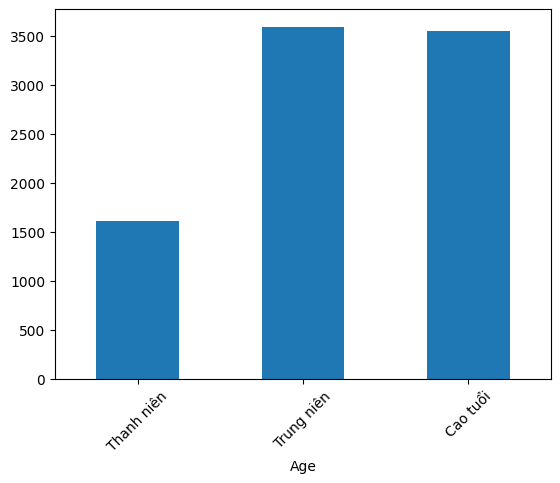

In [517]:
df.groupby('Age')['Age'].count().plot.bar()
plt.xticks(rotation=45)


Cholesterol

<Axes: xlabel='Cholesterol', ylabel='Density'>

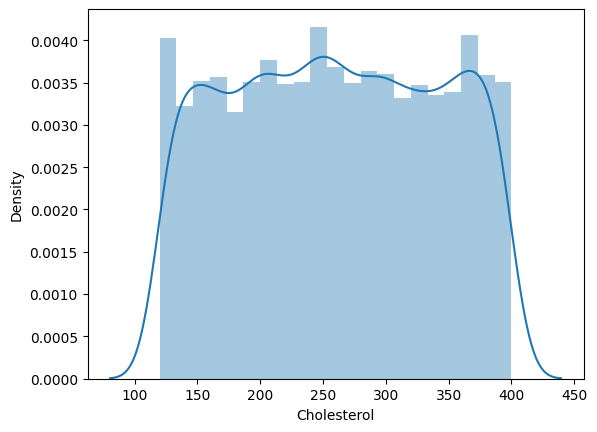

In [518]:
sns.distplot(df['Cholesterol'])

In [519]:
df['Cholesterol'].describe()

count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64

In [520]:
buckets = [119, 199, 238, 401]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Cholesterol = pd.cut(df['Cholesterol'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Cholesterol, df['Cholesterol']], axis=1).head(10)


,Cholesterol,Cholesterol
0,Cao,208
1,Rất cao,389
2,Rất cao,324
3,Rất cao,383
4,Rất cao,318
5,Rất cao,297
6,Rất cao,358
7,Cao,220
8,Bình thường,145
9,Rất cao,248


In [521]:
df['Cholesterol'] = discretised_Cholesterol
df['Cholesterol'].head()

0        Cao
1    Rất cao
2    Rất cao
3    Rất cao
4    Rất cao
Name: Cholesterol, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

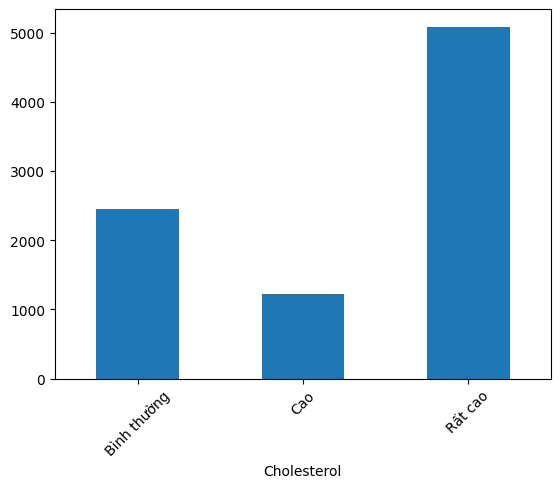

In [522]:
df.groupby('Cholesterol')['Cholesterol'].count().plot.bar()
plt.xticks(rotation=45)


Systolic Blood Pressure

<Axes: xlabel='Systolic Blood Pressure', ylabel='Density'>

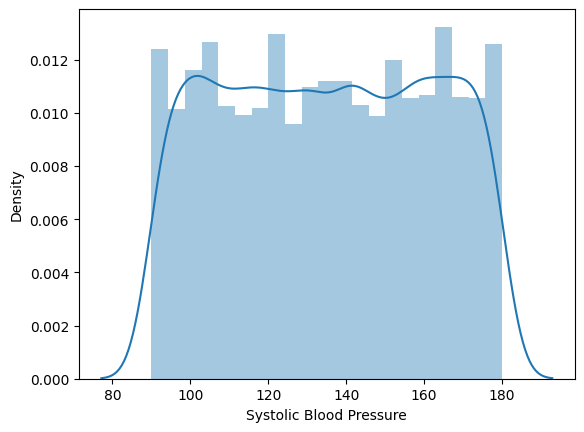

In [523]:
sns.distplot(df['Systolic Blood Pressure'])

In [524]:
df['Systolic Blood Pressure'].describe()

count    8763.000000
mean      135.075659
std        26.349976
min        90.000000
25%       112.000000
50%       135.000000
75%       158.000000
max       180.000000
Name: Systolic Blood Pressure, dtype: float64

In [525]:
buckets = [89, 119, 130, 181]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Systolic = pd.cut(df['Systolic Blood Pressure'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Systolic, df['Systolic Blood Pressure']], axis=1).head(10)


,Systolic Blood Pressure,Systolic Blood Pressure
0,Rất cao,158
1,Rất cao,165
2,Rất cao,174
3,Rất cao,163
4,Bình thường,91
5,Rất cao,172
6,Bình thường,102
7,Rất cao,131
8,Rất cao,144
9,Rất cao,160


In [526]:
df['Systolic Blood Pressure'] = discretised_Systolic
df['Systolic Blood Pressure'].head()

0        Rất cao
1        Rất cao
2        Rất cao
3        Rất cao
4    Bình thường
Name: Systolic Blood Pressure, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

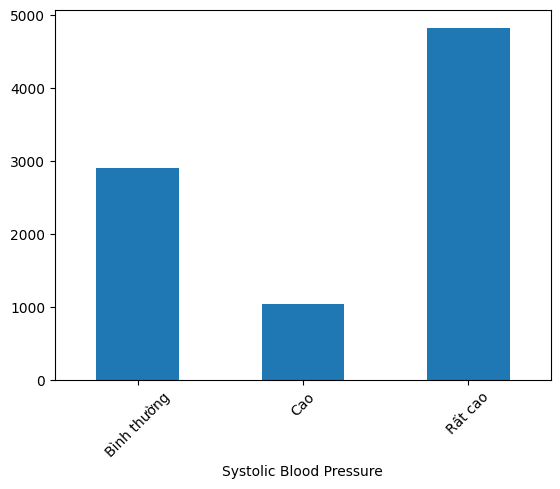

In [527]:
df.groupby('Systolic Blood Pressure')['Systolic Blood Pressure'].count().plot.bar()
plt.xticks(rotation=45)


Diastolic Blood Pressure

<Axes: xlabel='Diastolic Blood Pressure', ylabel='Density'>

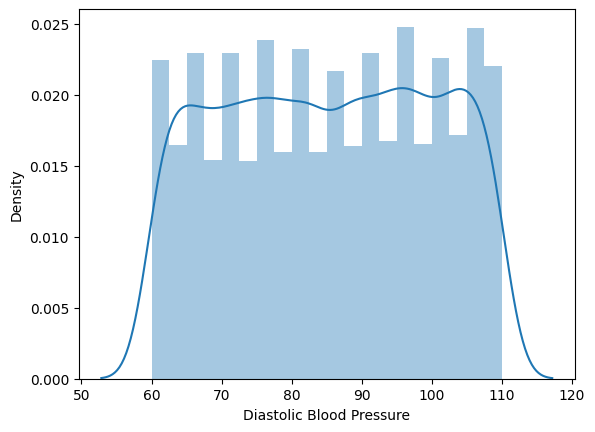

In [528]:
sns.distplot(df['Diastolic Blood Pressure'])

In [529]:
df['Diastolic Blood Pressure'].describe()

count    8763.000000
mean       85.156111
std        14.676565
min        60.000000
25%        72.000000
50%        85.000000
75%        98.000000
max       110.000000
Name: Diastolic Blood Pressure, dtype: float64

In [530]:
buckets = [59, 79, 89, 111]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Diastolic = pd.cut(df['Diastolic Blood Pressure'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Diastolic, df['Diastolic Blood Pressure']], axis=1).head(10)


,Diastolic Blood Pressure,Diastolic Blood Pressure
0,Cao,88
1,Rất cao,93
2,Rất cao,99
3,Rất cao,100
4,Cao,88
5,Cao,86
6,Bình thường,73
7,Bình thường,68
8,Rất cao,105
9,Bình thường,70


In [531]:
df['Diastolic Blood Pressure'] = discretised_Diastolic
df['Diastolic Blood Pressure'].head()

0        Cao
1    Rất cao
2    Rất cao
3    Rất cao
4        Cao
Name: Diastolic Blood Pressure, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

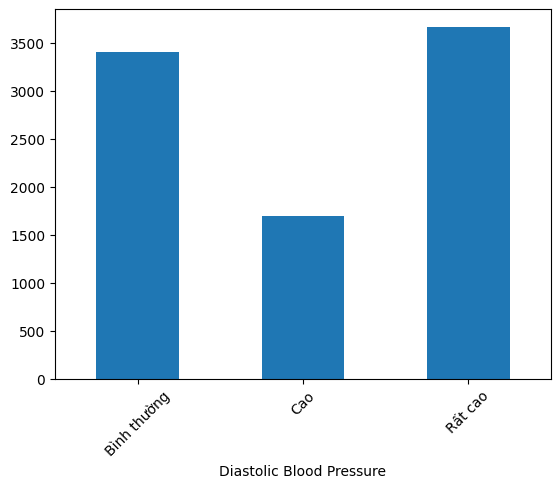

In [532]:
df.groupby('Diastolic Blood Pressure')['Diastolic Blood Pressure'].count().plot.bar()
plt.xticks(rotation=45)


Heart Rate

<Axes: xlabel='Heart Rate', ylabel='Density'>

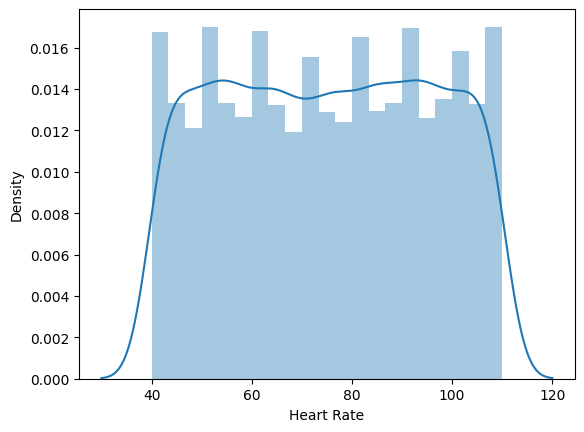

In [533]:
sns.distplot(df['Heart Rate'])

In [534]:
df['Heart Rate'].describe()

count    8763.000000
mean       75.021682
std        20.550948
min        40.000000
25%        57.000000
50%        75.000000
75%        93.000000
max       110.000000
Name: Heart Rate, dtype: float64

In [535]:
buckets = [39, 59, 100, 111]


labels = ['Thấp' , 'Bình thường', 'Cao']


discretised_Rate = pd.cut(df['Heart Rate'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Rate, df['Heart Rate']], axis=1).head(10)


,Heart Rate,Heart Rate
0,Bình thường,72
1,Bình thường,98
2,Bình thường,72
3,Bình thường,73
4,Bình thường,93
5,Thấp,48
6,Bình thường,84
7,Cao,107
8,Bình thường,68
9,Thấp,55


In [536]:
df['Heart Rate'] = discretised_Rate
df['Heart Rate'].head()

0    Bình thường
1    Bình thường
2    Bình thường
3    Bình thường
4    Bình thường
Name: Heart Rate, dtype: category
Categories (3, object): ['Thấp' < 'Bình thường' < 'Cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Thấp'), Text(1, 0, 'Bình thường'), Text(2, 0, 'Cao')])

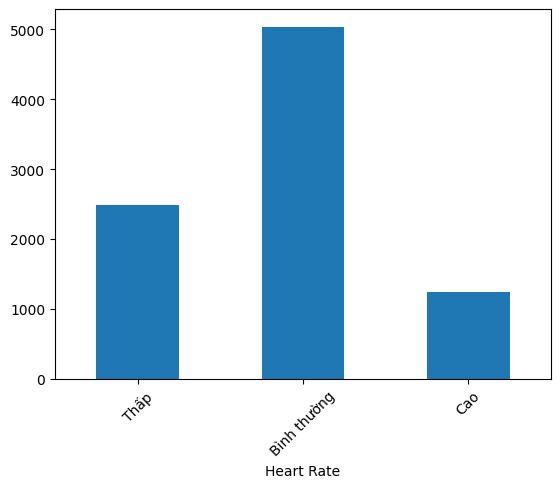

In [537]:
df.groupby('Heart Rate')['Heart Rate'].count().plot.bar()
plt.xticks(rotation=45)


BMI

<Axes: xlabel='BMI', ylabel='Density'>

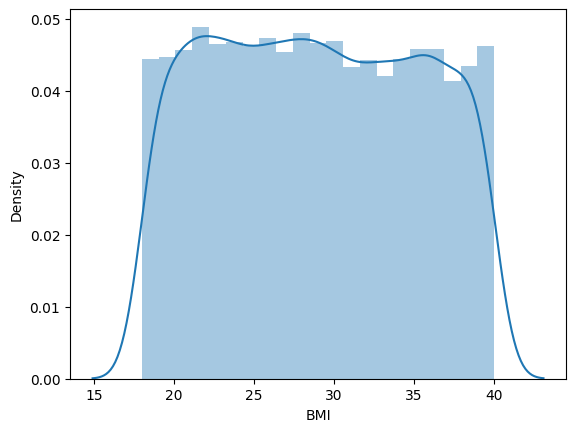

In [538]:
sns.distplot(df['BMI'])

In [539]:
df['BMI'].describe()

count    8763.000000
mean       28.891446
std         6.319181
min        18.002337
25%        23.422985
50%        28.768999
75%        34.324594
max        39.997211
Name: BMI, dtype: float64

In [540]:
buckets = [18, 24.9, 29, 40]


labels = ['Bình thường', 'Thừa cân', 'Béo phì']


discretised_bmi = pd.cut(df['BMI'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_bmi, df['BMI']], axis=1).head(10)


,BMI,BMI
0,Béo phì,31.251233
1,Thừa cân,27.194973
2,Thừa cân,28.176571
3,Béo phì,36.464704
4,Bình thường,21.809144
5,Bình thường,20.146840
6,Thừa cân,28.885811
7,Bình thường,22.221862
8,Béo phì,35.809901
9,Bình thường,22.558917


In [541]:
df['BMI'] = discretised_bmi
df['BMI'].head()

0        Béo phì
1       Thừa cân
2       Thừa cân
3        Béo phì
4    Bình thường
Name: BMI, dtype: category
Categories (3, object): ['Bình thường' < 'Thừa cân' < 'Béo phì']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Thừa cân'), Text(2, 0, 'Béo phì')])

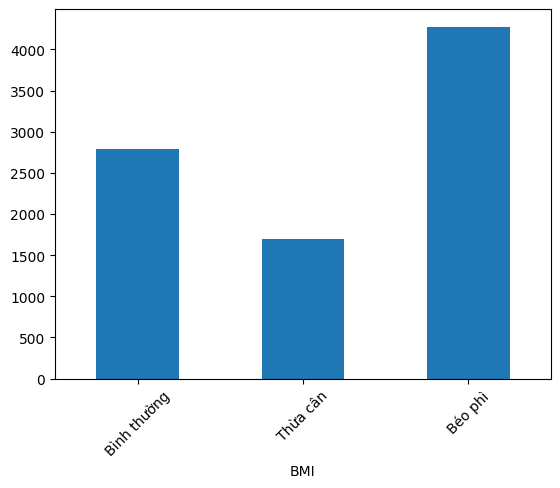

In [542]:
df.groupby('BMI')['BMI'].count().plot.bar()
plt.xticks(rotation=45)


stress level

<Axes: xlabel='Stress Level', ylabel='Density'>

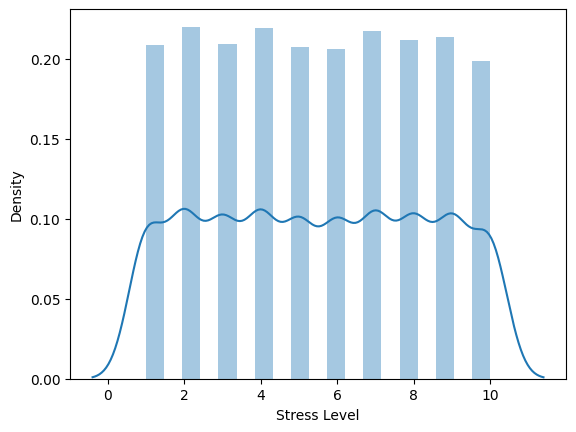

In [543]:
sns.distplot(df['Stress Level'])

In [544]:
df['Stress Level'].describe()

count    8763.000000
mean        5.469702
std         2.859622
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress Level, dtype: float64

In [545]:
buckets = [0, 3, 6, 10]


labels = ['bình thường', 'cao', 'rất cao']


df['Stress Level'] = pd.cut(df['Stress Level'], bins=buckets, labels=labels, include_lowest=True)

df['Stress Level'].head()


0        rất cao
1    bình thường
2        rất cao
3        rất cao
4            cao
Name: Stress Level, dtype: category
Categories (3, object): ['bình thường' < 'cao' < 'rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'bình thường'), Text(1, 0, 'cao'), Text(2, 0, 'rất cao')])

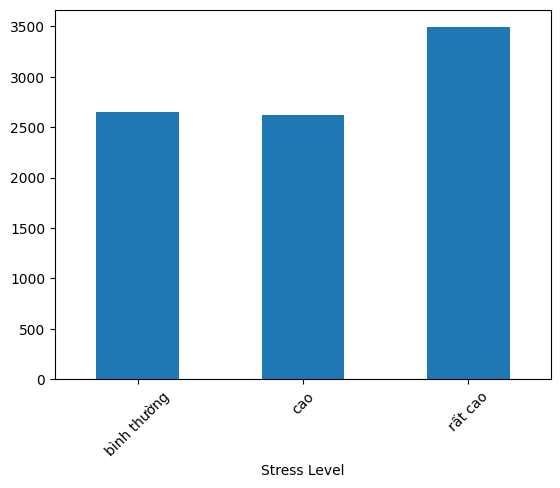

In [546]:
df.groupby('Stress Level')['Stress Level'].count().plot.bar()
plt.xticks(rotation=45)


Activity_Balance_Index

In [547]:
df['Activity_Balance_Index'] = ((df['Exercise Hours Per Week']/7) + (df['Physical Activity Days Per Week']*24)/7) / (df['Sedentary Hours Per Day']+df['Sleep Hours Per Day'])
df['Activity_Balance_Index'].describe()

count    8763.000000
mean        1.155530
std         0.855383
min         0.000052
25%         0.511264
50%         1.021044
75%         1.591378
max         6.457430
Name: Activity_Balance_Index, dtype: float64

<Axes: xlabel='Activity_Balance_Index', ylabel='Density'>

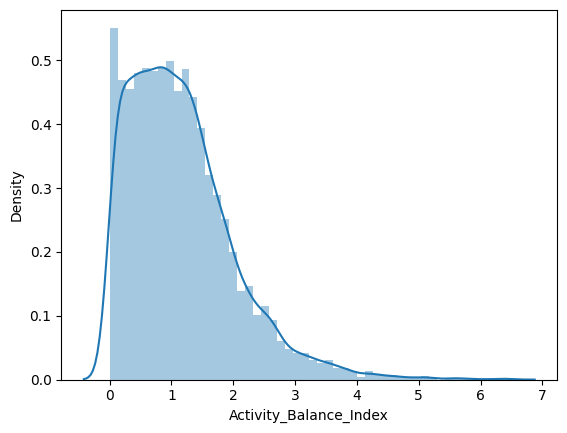

In [548]:
sns.distplot(df['Activity_Balance_Index'])

In [549]:
buckets = [0, 0.49, 1.5, 7]


labels = ['thấp', 'bình thường', 'cao']


discretised_abi = pd.cut(df['Activity_Balance_Index'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_abi, df['Activity_Balance_Index']], axis=1).head(10)


,Activity_Balance_Index,Activity_Balance_Index
0,thấp,0.047202
1,thấp,0.308239
2,bình thường,1.040686
3,bình thường,1.003498
4,bình thường,0.653549
5,bình thường,0.968166
6,bình thường,1.345559
7,bình thường,1.200490
8,cao,1.720641
9,cao,2.173454


In [550]:
df['Activity_Balance_Index'] = discretised_abi
df['Activity_Balance_Index'].head()

0           thấp
1           thấp
2    bình thường
3    bình thường
4    bình thường
Name: Activity_Balance_Index, dtype: category
Categories (3, object): ['thấp' < 'bình thường' < 'cao']

(array([0, 1, 2]),
 [Text(0, 0, 'thấp'), Text(1, 0, 'bình thường'), Text(2, 0, 'cao')])

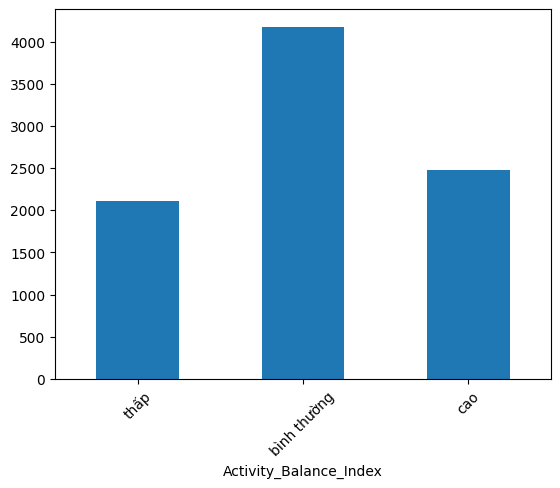

In [551]:
df.groupby('Activity_Balance_Index')['Activity_Balance_Index'].count().plot.bar()
plt.xticks(rotation=45)


Triglycerides

<Axes: xlabel='Triglycerides', ylabel='Density'>

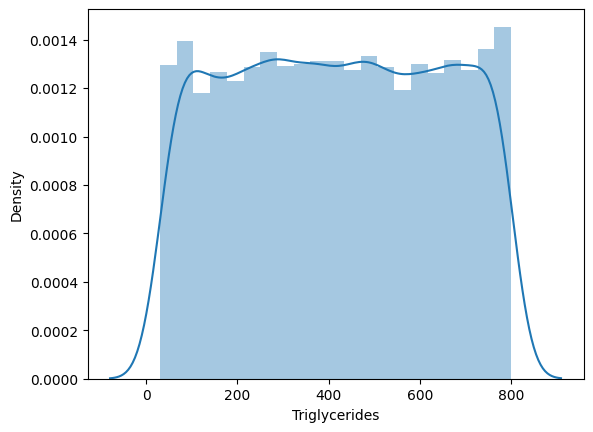

In [552]:
sns.distplot(df['Triglycerides'])

In [553]:
df['Triglycerides'].describe()

count    8763.000000
mean      417.677051
std       223.748137
min        30.000000
25%       225.500000
50%       417.000000
75%       612.000000
max       800.000000
Name: Triglycerides, dtype: float64

In [554]:
buckets = [29, 149, 199, 801]


labels = ['Bình thường',  'Cao', 'Rất cao']


discretised_Triglycerides = pd.cut(df['Triglycerides'], bins=buckets, labels=labels, include_lowest=True)
pd.concat([discretised_Triglycerides, df['Triglycerides']], axis=1).head(10)


,Triglycerides,Triglycerides
0,Rất cao,286
1,Rất cao,235
2,Rất cao,587
3,Rất cao,378
4,Rất cao,231
5,Rất cao,795
6,Rất cao,284
7,Rất cao,370
8,Rất cao,790
9,Rất cao,232


In [555]:
df['Triglycerides'] = discretised_Triglycerides
df['Triglycerides'].head()

0    Rất cao
1    Rất cao
2    Rất cao
3    Rất cao
4    Rất cao
Name: Triglycerides, dtype: category
Categories (3, object): ['Bình thường' < 'Cao' < 'Rất cao']

(array([0, 1, 2]),
 [Text(0, 0, 'Bình thường'), Text(1, 0, 'Cao'), Text(2, 0, 'Rất cao')])

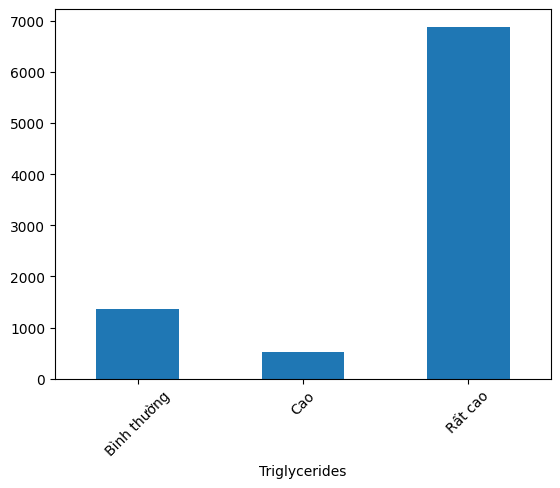

In [556]:
df.groupby('Triglycerides')['Triglycerides'].count().plot.bar()
plt.xticks(rotation=45)


In [557]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index
0,Cao tuổi,Male,Cao,Bình thường,0,0,1,0,0,4.168189,...,Rất cao,0,6,Argentina,South America,Southern Hemisphere,0,Rất cao,Cao,thấp
1,Thanh niên,Male,Rất cao,Bình thường,1,1,1,1,1,1.813242,...,Rất cao,1,7,Canada,North America,Northern Hemisphere,0,Rất cao,Rất cao,thấp
2,Thanh niên,Female,Rất cao,Bình thường,1,0,0,0,0,2.078353,...,Rất cao,4,4,France,Europe,Northern Hemisphere,0,Rất cao,Rất cao,bình thường
3,Cao tuổi,Male,Rất cao,Bình thường,1,1,1,0,1,9.828130,...,Rất cao,3,4,Canada,North America,Northern Hemisphere,0,Rất cao,Rất cao,bình thường
4,Cao tuổi,Male,Rất cao,Bình thường,1,1,1,1,0,5.804299,...,Rất cao,1,5,Thailand,Asia,Northern Hemisphere,0,Bình thường,Cao,bình thường
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,Trung niên,Male,Bình thường,Bình thường,1,1,1,0,1,7.917342,...,Bình thường,7,7,Thailand,Asia,Northern Hemisphere,0,Bình thường,Bình thường,bình thường
8759,Thanh niên,Female,Bình thường,Bình thường,1,0,0,1,0,16.558426,...,Rất cao,4,9,Canada,North America,Northern Hemisphere,0,Rất cao,Rất cao,bình thường
8760,Trung niên,Male,Rất cao,Cao,0,1,1,1,1,3.148438,...,Rất cao,4,4,Brazil,South America,Southern Hemisphere,1,Rất cao,Bình thường,cao
8761,Trung niên,Male,Bình thường,Bình thường,1,0,1,0,0,3.789950,...,Bình thường,2,8,Brazil,South America,Southern Hemisphere,0,Bình thường,Bình thường,bình thường


##### Chuẩn hóa chữ về dạng số

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Age                              8763 non-null   category
 1   Sex                              8763 non-null   object  
 2   Cholesterol                      8763 non-null   category
 3   Heart Rate                       8763 non-null   category
 4   Diabetes                         8763 non-null   int64   
 5   Family History                   8763 non-null   int64   
 6   Smoking                          8763 non-null   int64   
 7   Obesity                          8763 non-null   int64   
 8   Alcohol Consumption              8763 non-null   int64   
 9   Exercise Hours Per Week          8763 non-null   float64 
 10  Diet                             8763 non-null   object  
 11  Previous Heart Problems          8763 non-null   int64   
 12  Medica

Age

In [559]:
df.groupby(['Age'])['Heart Attack Risk'].mean().sort_values()

Age
Trung niên    0.351697
Thanh niên    0.361610
Cao tuổi      0.363253
Name: Heart Attack Risk, dtype: float64

In [560]:
ordered_cats = df.groupby(['Age'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Age'] = df['Age'].map(cat_map).astype(int)

Sex

In [561]:
df.groupby(['Sex'])['Heart Attack Risk'].mean().sort_values()

Sex
Female    0.355958
Male      0.359188
Name: Heart Attack Risk, dtype: float64

In [562]:
ordered_cats = df.groupby(['Sex'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Sex'] = df['Sex'].map(cat_map)

Country

In [563]:
df.groupby(['Country'])['Heart Attack Risk'].mean().sort_values()

Country
India             0.313107
Italy             0.315545
Japan             0.332564
South Africa      0.338824
New Zealand       0.347126
Vietnam           0.348235
Spain             0.348837
United Kingdom    0.350109
France            0.352018
Brazil            0.352814
China             0.355505
Canada            0.359091
Germany           0.360587
Argentina         0.369427
Australia         0.374165
Thailand          0.376168
Colombia          0.377622
United States     0.395238
Nigeria           0.397321
South Korea       0.398533
Name: Heart Attack Risk, dtype: float64

In [564]:
ordered_cats = df.groupby(['Country'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Country'] = df['Country'].map(cat_map)

Continent

In [565]:
df.groupby(['Continent'])['Heart Attack Risk'].mean().sort_values()

Continent
Europe           0.345828
Asia             0.353913
Australia        0.360860
South America    0.366373
Africa           0.368843
North America    0.376744
Name: Heart Attack Risk, dtype: float64

In [566]:
ordered_cats = df.groupby(['Continent'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Continent'] = df['Continent'].map(cat_map)

Hemisphere

In [567]:
df.groupby(['Hemisphere'])['Heart Attack Risk'].mean().sort_values()

Hemisphere
Southern Hemisphere    0.349984
Northern Hemisphere    0.362721
Name: Heart Attack Risk, dtype: float64

In [568]:
ordered_cats = df.groupby(['Hemisphere'])['Heart Attack Risk'].mean().sort_values().index
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)}
df['Hemisphere'] = df['Hemisphere'].map(cat_map)

Cholesterol

In [569]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao	', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Cholesterol'])

df['Cholesterol'] = le.transform(df['Cholesterol'])


Diet

In [570]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Healthy', 'Average', 'Unhealthy']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Diet'])

df['Diet'] = le.transform(df['Diet'])


Heart Rate

In [571]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Thấp', 'Cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Heart Rate'])

df['Heart Rate'] = le.transform(df['Heart Rate'])


BMI

In [572]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Thừa cân', 'Béo phì']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['BMI'])

df['BMI'] = le.transform(df['BMI'])


stress level

In [573]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['bình thường', 'cao', 'rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Stress Level'])

df['Stress Level'] = le.transform(df['Stress Level'])


Activity_Balance_Index

In [574]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['bình thường', 'cao', 'thấp']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Activity_Balance_Index'])

df['Activity_Balance_Index'] = le.transform(df['Activity_Balance_Index'])


Triglycerides

In [575]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Triglycerides'])

df['Triglycerides'] = le.transform(df['Triglycerides'])


Systolic Blood Pressure

In [576]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Systolic Blood Pressure'])

df['Systolic Blood Pressure'] = le.transform(df['Systolic Blood Pressure'])


Diastolic Blood Pressure

In [577]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

custom_order = ['Bình thường', 'Cao', 'Rất cao']

# Khởi tạo LabelEncoder với thứ tự đã chỉ định
le = LabelEncoder()
le.classes_ = custom_order

le.fit(df['Diastolic Blood Pressure'])

df['Diastolic Blood Pressure'] = le.transform(df['Diastolic Blood Pressure'])


In [578]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index
0,2,1,1,0,0,0,1,0,0,4.168189,...,2,0,6,13,3,0,0,2,1,2
1,1,1,2,0,1,1,1,1,1,1.813242,...,2,1,7,11,5,1,0,2,2,2
2,1,0,2,0,1,0,0,0,0,2.078353,...,2,4,4,8,0,1,0,2,2,0
3,2,1,2,0,1,1,1,0,1,9.828130,...,2,3,4,11,5,1,0,2,2,0
4,2,1,2,0,1,1,1,1,0,5.804299,...,2,1,5,15,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,1,0,0,1,1,1,0,1,7.917342,...,0,7,7,15,1,1,0,0,0,0
8759,1,0,0,0,1,0,0,1,0,16.558426,...,2,4,9,11,5,1,0,2,2,0
8760,0,1,2,1,0,1,1,1,1,3.148438,...,2,4,4,9,3,0,1,2,0,1
8761,0,1,0,0,1,0,1,0,0,3.789950,...,0,2,8,9,3,0,0,0,0,0


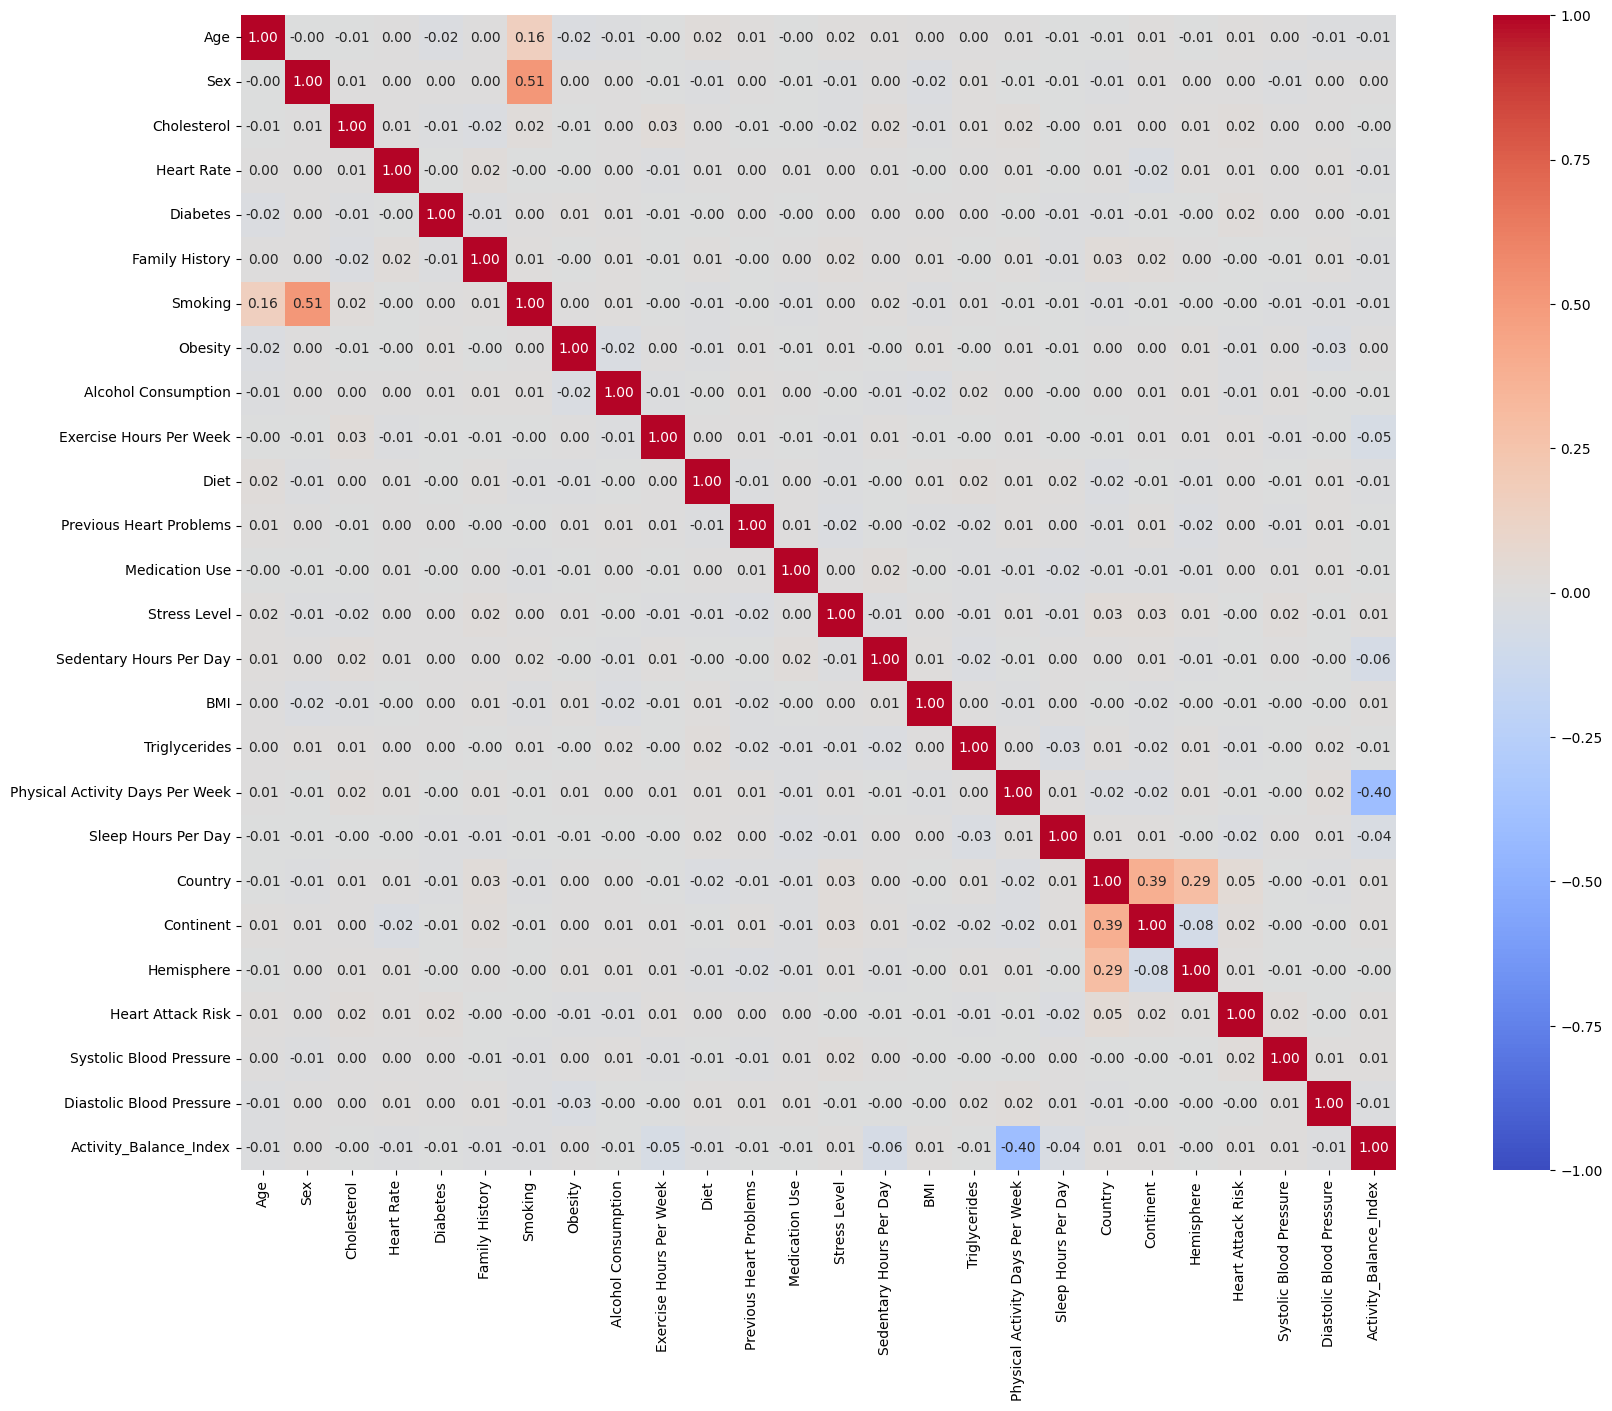

In [579]:

plt.figure(figsize=(25, 15))  # Kích thước 25x15 inch
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cmap='coolwarm')  # Sử dụng bảng màu 'coolwarm'
plt.show()


**các đặc trưng không có sự tương quan mạnh với nhau và có thể làm hiệu suất mô hình giảm nên em tạo thêm đặc trưng mới được kết hợp từ các đặc trưng có sẵn để tăng hiệu suất mô hình** 

In [580]:
# Chọn các đặc trưng bạn muốn cộng
selected_features = ['Age','Cholesterol', 'Heart Rate', 
                      'Diet', 
                     'Stress Level', 'BMI', 'Triglycerides',
                     'Systolic Blood Pressure', 'Diastolic Blood Pressure','Activity_Balance_Index']

# Tạo một đặc trưng mới là tổng của các đặc trưng đã chọn
df['Chỉ số sức khỏe'] = df[selected_features].sum(axis=1) / len(selected_features)
# Chọn các đặc trưng bạn muốn cộng
df['Medication Use']=1-df['Medication Use']
selected_features = ['Sex','Diabetes', 'Family History', 'Smoking', 'Obesity',
                     'Alcohol Consumption',  'Previous Heart Problems' ,'Medication Use']

# Tạo một đặc trưng mới là tổng của các đặc trưng đã chọn
df['lối sống'] = df[selected_features].sum(axis=1) / len(selected_features)

# Nhân đôi chỉ số "risk level" khi "Cholesterol" có giá trị là 2
# df['risk level'] += df['Cholesterol'].apply(lambda x: x * 2 if x == 2 else 0)
# Chọn các đặc trưng bạn muốn cộng
# selected_features = ['Country',	'Continent'	,'Hemisphere']

# Tạo một đặc trưng mới là tổng của các đặc trưng đã chọn
df['môi tường sống'] = ((df['Country'])+(df['Continent'])+df['Hemisphere'])/3

df


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống
0,2,1,1,0,0,0,1,0,0,4.168189,...,13,3,0,0,2,1,2,1.2,0.375,5.333333
1,1,1,2,0,1,1,1,1,1,1.813242,...,11,5,1,0,2,2,2,1.5,1.000,5.666667
2,1,0,2,0,1,0,0,0,0,2.078353,...,8,0,1,0,2,2,0,1.4,0.250,3.000000
3,2,1,2,0,1,1,1,0,1,9.828130,...,11,5,1,0,2,2,0,1.2,0.875,5.666667
4,2,1,2,0,1,1,1,1,0,5.804299,...,15,1,1,0,0,1,0,1.1,0.875,5.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,1,0,0,1,1,1,0,1,7.917342,...,15,1,1,0,0,0,0,0.4,0.750,5.666667
8759,1,0,0,0,1,0,0,1,0,16.558426,...,11,5,1,0,2,2,0,1.1,0.375,5.666667
8760,0,1,2,1,0,1,1,1,1,3.148438,...,9,3,0,1,2,0,1,0.9,0.875,4.000000
8761,0,1,0,0,1,0,1,0,0,3.789950,...,9,3,0,0,0,0,0,0.5,0.500,4.000000


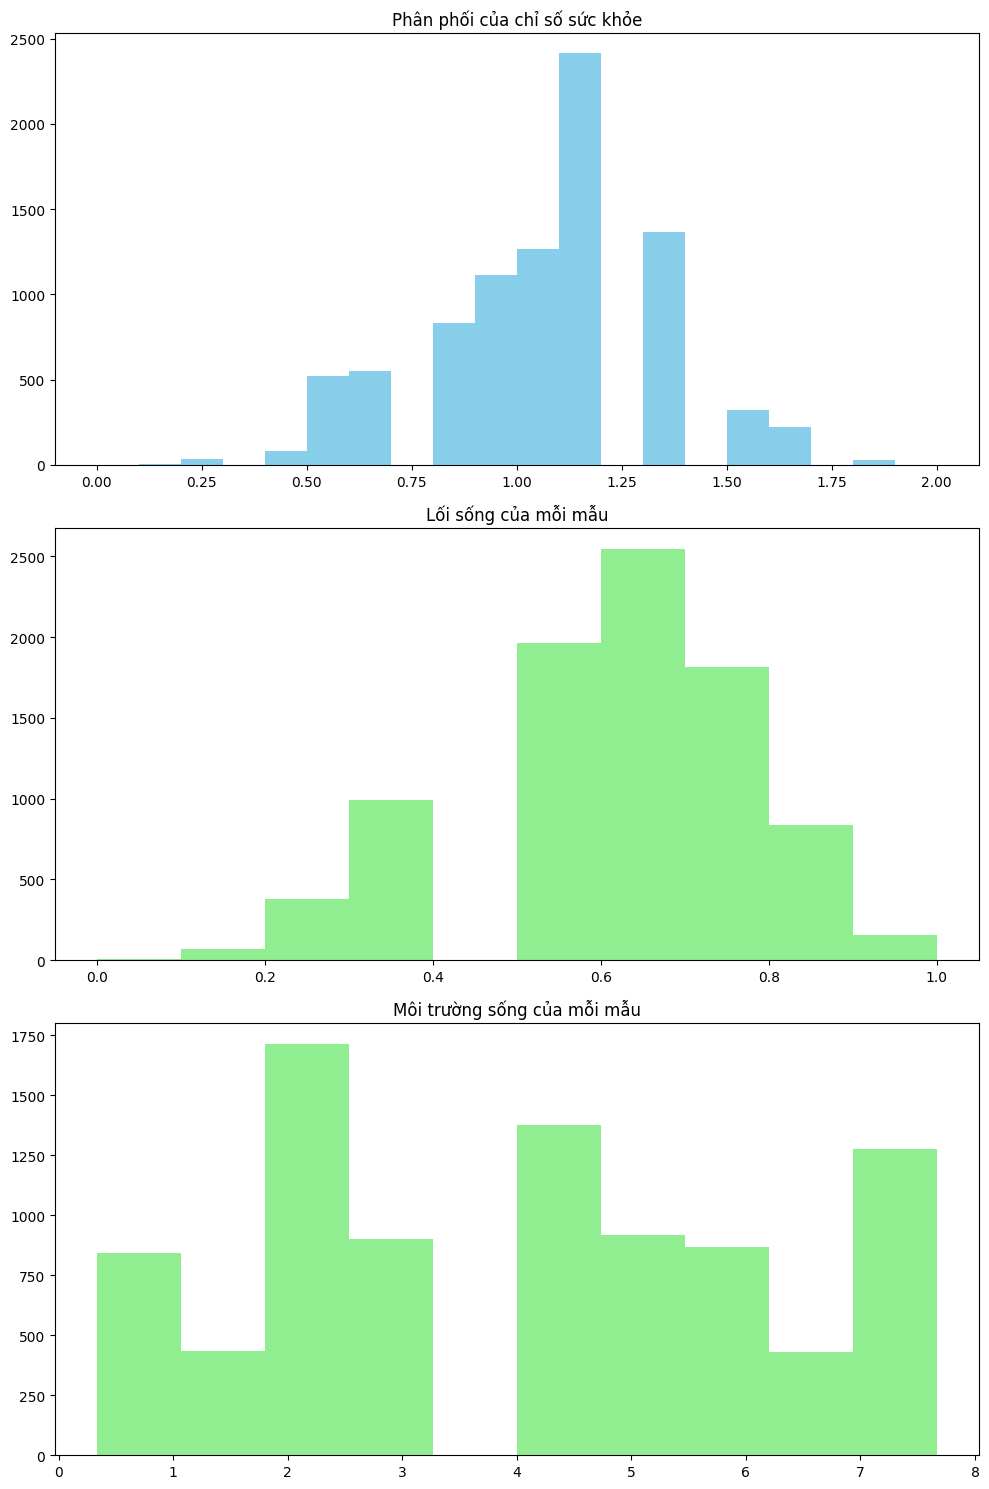

In [581]:
import matplotlib.pyplot as plt

# Tạo subplot cho các cột mới
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Trực quan hóa chỉ số sức khỏe
axes[0].hist(df['Chỉ số sức khỏe'], bins=20, color='skyblue')
axes[0].set_title('Phân phối của chỉ số sức khỏe')

# Trực quan hóa môi trường sống
axes[1].hist(df['lối sống'], color='lightgreen')
axes[1].set_title('Lối sống của mỗi mẫu')

# Trực quan hóa môi trường sống
axes[2].hist(df['môi tường sống'], color='lightgreen')
axes[2].set_title('Môi trường sống của mỗi mẫu')
plt.tight_layout()
plt.show()


In [582]:
df[['Chỉ số sức khỏe','lối sống','môi tường sống']].describe()

,Chỉ số sức khỏe,lối sống,môi tường sống
count,8763.000000,8763.000000,8763.000000
mean,1.045087,0.604559,4.008635
std,0.269044,0.173953,2.216110
min,0.000000,0.000000,0.333333
25%,0.900000,0.500000,2.333333
50%,1.000000,0.625000,4.000000
75%,1.200000,0.750000,5.666667
max,2.000000,1.000000,7.666667


In [583]:
df["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [584]:
(3139/5629)*4

2.2305915793213713

In [585]:
# import pandas as pd

# class HeartRiskAssessment:
#     def __init__(self, risk_level,loisong,risk_place, heart_attack_risk):
#         self.risk_level = risk_level
#         self.heart_attack_risk = heart_attack_risk
#         self.risk_place=risk_place
#         self.loisong=loisong
#     def calculate_risk_score(self):
        
#         # Tính toán điểm rủi ro
#         risk_score = self.risk_level+self.loisong + self.risk_place/3
#         return risk_score

#     def assess_risk_level(self):
#         risk_score = self.calculate_risk_score()
#         heart_attack_risk=self.heart_attack_risk
#         # Xác định mức độ rủi ro dựa trên điểm rủi ro
#         if heart_attack_risk == 0 and 0<=risk_score<=1.1 :
#             return 0
#         elif heart_attack_risk == 0 and 1.1 < risk_score <= 2.2:
#             return 1
#         elif heart_attack_risk == 1 and 2.2 < risk_score <= 3.1:
#             return 2
#         elif heart_attack_risk == 1 and risk_score>3.1:
#             return 3




# # Áp dụng HeartRiskAssessment cho từng hàng và thêm kết quả vào cột 'new'
# df['mức độ nguy cơ'] = df.apply(lambda row: HeartRiskAssessment(row['Chỉ số sức khỏe'],row['lối sống'],row['môi tường sống'], row['Heart Attack Risk']).assess_risk_level(), axis=1)

# print(df)


In [586]:
import pandas as pd

class HeartRiskAssessment:
    def __init__(self, risk_level,loisong,risk_place, heart_attack_risk):
        self.risk_level = risk_level
        self.heart_attack_risk = heart_attack_risk
        self.risk_place=risk_place
        self.loisong=loisong
    def calculate_risk_score(self):
        heart_attack_risk=self.heart_attack_risk
        # Tính toán điểm rủi ro
        risk_level = self.risk_level
        loisong=self.loisong 
        risk_place=self.risk_place
         # Xác định mức độ rủi ro dựa trên điểm rủi ro
        if heart_attack_risk == 0 and (0<=risk_level<=0.53 and 0<=loisong<=0.279 and 0<=risk_place<=2.1375) :
            return 0
        elif heart_attack_risk == 0 and ((0<=risk_level<=0.53 and 0<=loisong<=0.279)or(0<=loisong<=0.279 and 0<=risk_place<=2.1375)or(0<=risk_level<=0.53 and 0<=risk_place<=2.1375)):
            return 1
        elif heart_attack_risk == 0 and (0<=risk_level<=0.53 or 0<=loisong<=0.279 or 0<=risk_place<=2.1375):
            return 2
        elif heart_attack_risk == 0 and (0.53<=risk_level<=1.05 and 0.279<=loisong<=0.558 and 2.1375<=risk_place<=4.275) :
            return 3
        elif heart_attack_risk == 0 and ((0.53<=risk_level<=1.05 and 0.279<=loisong<=0.558)or(2.1375<=loisong<=0.558 and 2.1375<=risk_place<=4.275)or(0.53<=risk_level<=1.05 and 2.1375<=risk_place<=4.275 )):
            return 4
        elif heart_attack_risk == 0 and (0.53<=risk_level<=1.05 or 0.279<=loisong<=0.558 or 2.1375<=risk_place<=4.275):
            return 5
        elif heart_attack_risk == 1 and (1.05<=risk_level<=1.475 or 0.558<=loisong<=0.779 or 4.275<=risk_place<=5.971):
            return 6
        
        elif heart_attack_risk == 1 and ((1.05<=risk_level<=1.475 and 0.558<=loisong<=0.779)or(0.558<=loisong<=0.779 and 4.275<=risk_place<=5.971)or(1.05<=risk_level<=1.475 and 4.275<=risk_place<=5.971 )):
            return 7
        elif heart_attack_risk == 1 and (1.05<=risk_level<=1.475 and 0.558<=loisong<=0.779 and 4.275<=risk_place<=5.971) :
            return 8
        elif heart_attack_risk == 1 and (risk_level>1.475 or loisong>0.779 or risk_place>5.971):
            return 9
        elif heart_attack_risk == 1 and ((risk_level>1.475 and loisong>0.779)or(loisong>0.779 and risk_place>5.971)or(risk_level>1.475 and risk_place>5.971)):
            return 10
        elif heart_attack_risk == 1 and (risk_level>1.475 and loisong>0.779 and risk_place>5.971):
            return 11
        # if heart_attack_risk == 0 and (0<=risk_level<=1.05 and 0<=loisong<=0.558 and 0<=risk_place<=4.275) :
        #     return 0
        # elif heart_attack_risk == 0 and ((0<=risk_level<=1.05 and 0<=loisong<=0.558)or(0<=loisong<=0.558 and 0<=risk_place<=4.275)or(0<=risk_level<=1.05 and 0<=risk_place<=4.275 )):
        #     return 1
        # elif heart_attack_risk == 0 and (0<=risk_level<=1.05 or 0<=loisong<=0.558 or 0<=risk_place<=4.275):
        #     return 2
        # elif heart_attack_risk == 1 and (risk_level>1.05 or loisong>0.558 or risk_place>4.275):
        #     return 3
        # elif heart_attack_risk == 1 and ((risk_level>1.05 and loisong>0.558)or(loisong>0.558 and risk_place>4.275)or(risk_level>1.05 and risk_place>4.275)):
        #     return 4
        # elif heart_attack_risk == 1 and (risk_level>1.05 and loisong>0.558 and risk_place>4.275):
        #     return 5
        

    




# Áp dụng HeartRiskAssessment cho từng hàng và thêm kết quả vào cột 'new'
df['mức độ nguy cơ'] = df.apply(lambda row: HeartRiskAssessment(row['Chỉ số sức khỏe'],row['lối sống'],row['môi tường sống'], row['Heart Attack Risk']).calculate_risk_score(), axis=1)

df


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,0,2,1,2,1.2,0.375,5.333333,5.0
1,1,1,2,0,1,1,1,1,1,1.813242,...,5,1,0,2,2,2,1.5,1.000,5.666667,NaN
2,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,0,2,2,0,1.4,0.250,3.000000,2.0
3,2,1,2,0,1,1,1,0,1,9.828130,...,5,1,0,2,2,0,1.2,0.875,5.666667,NaN
4,2,1,2,0,1,1,1,1,0,5.804299,...,1,1,0,0,1,0,1.1,0.875,5.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,1,0,0,1,1,1,0,1,7.917342,...,1,1,0,0,0,0,0.4,0.750,5.666667,2.0
8759,1,0,0,0,1,0,0,1,0,16.558426,...,5,1,0,2,2,0,1.1,0.375,5.666667,5.0
8760,0,1,2,1,0,1,1,1,1,3.148438,...,3,0,1,2,0,1,0.9,0.875,4.000000,9.0
8761,0,1,0,0,1,0,1,0,0,3.789950,...,3,0,0,0,0,0,0.5,0.500,4.000000,2.0


In [587]:
df.isnull().sum()

Age                                   0
Sex                                   0
Cholesterol                           0
Heart Rate                            0
Diabetes                              0
Family History                        0
Smoking                               0
Obesity                               0
Alcohol Consumption                   0
Exercise Hours Per Week               0
Diet                                  0
Previous Heart Problems               0
Medication Use                        0
Stress Level                          0
Sedentary Hours Per Day               0
BMI                                   0
Triglycerides                         0
Physical Activity Days Per Week       0
Sleep Hours Per Day                   0
Country                               0
Continent                             0
Hemisphere                            0
Heart Attack Risk                     0
Systolic Blood Pressure               0
Diastolic Blood Pressure              0


In [588]:
df=df.dropna()
df.isnull().sum()


Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Systolic Blood Pressure            0
Diastolic Blood Pressure           0
Activity_Balance_Index             0
Chỉ số sức khỏe                    0
l

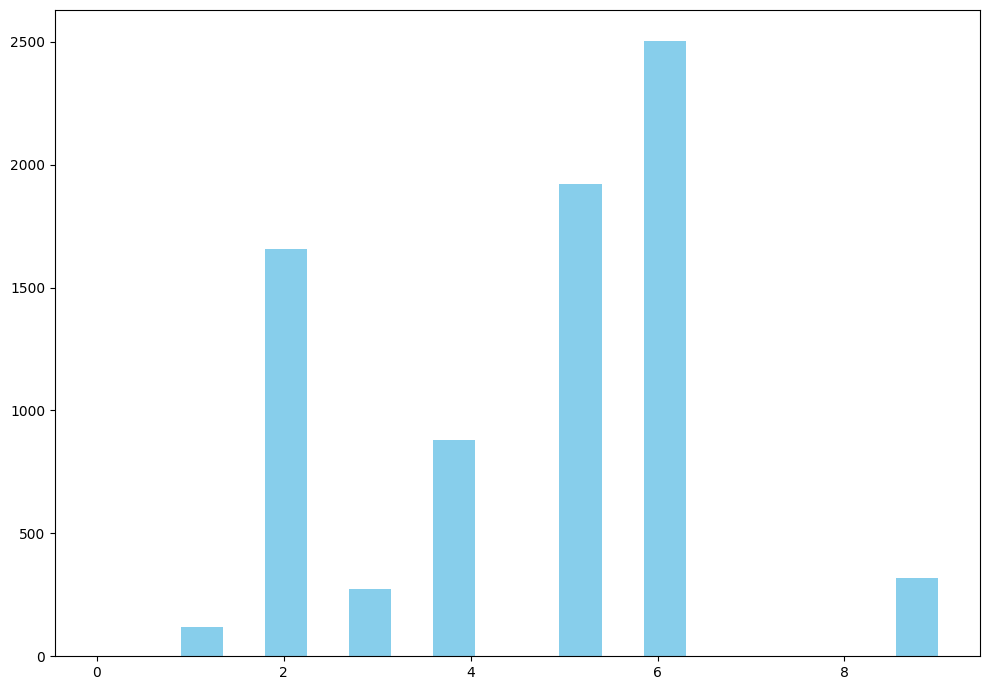

In [589]:
import matplotlib.pyplot as plt

# Tạo subplot cho các cột mới
fig = plt.subplots(figsize=(10, 7))

# Trực quan hóa chỉ số sức khỏe
plt.hist(df['mức độ nguy cơ'], bins=20, color='skyblue')



plt.tight_layout()
plt.show()


In [590]:
df['mức độ nguy cơ'].value_counts()

mức độ nguy cơ
6.0    2504
5.0    1921
2.0    1656
4.0     881
9.0     319
3.0     275
1.0     121
0.0       2
Name: count, dtype: int64

In [591]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,0,2,1,2,1.2,0.375,5.333333,5.0
2,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,0,2,2,0,1.4,0.250,3.000000,2.0
5,0,0,2,2,1,1,1,0,1,0.625008,...,0,1,1,2,1,0,1.2,0.625,4.333333,6.0
6,2,1,2,0,0,0,1,0,1,4.098177,...,5,1,1,0,0,0,1.1,0.500,5.666667,6.0
8,1,1,0,0,1,0,1,1,0,16.868302,...,3,0,0,2,2,1,0.9,0.625,4.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,0,0,2,0,0,1,1,1,0,1.857908,...,1,1,0,0,0,2,0.7,0.500,4.000000,3.0
8758,0,1,0,0,1,1,1,0,1,7.917342,...,1,1,0,0,0,0,0.4,0.750,5.666667,2.0
8759,1,0,0,0,1,0,0,1,0,16.558426,...,5,1,0,2,2,0,1.1,0.375,5.666667,5.0
8760,0,1,2,1,0,1,1,1,1,3.148438,...,3,0,1,2,0,1,0.9,0.875,4.000000,9.0


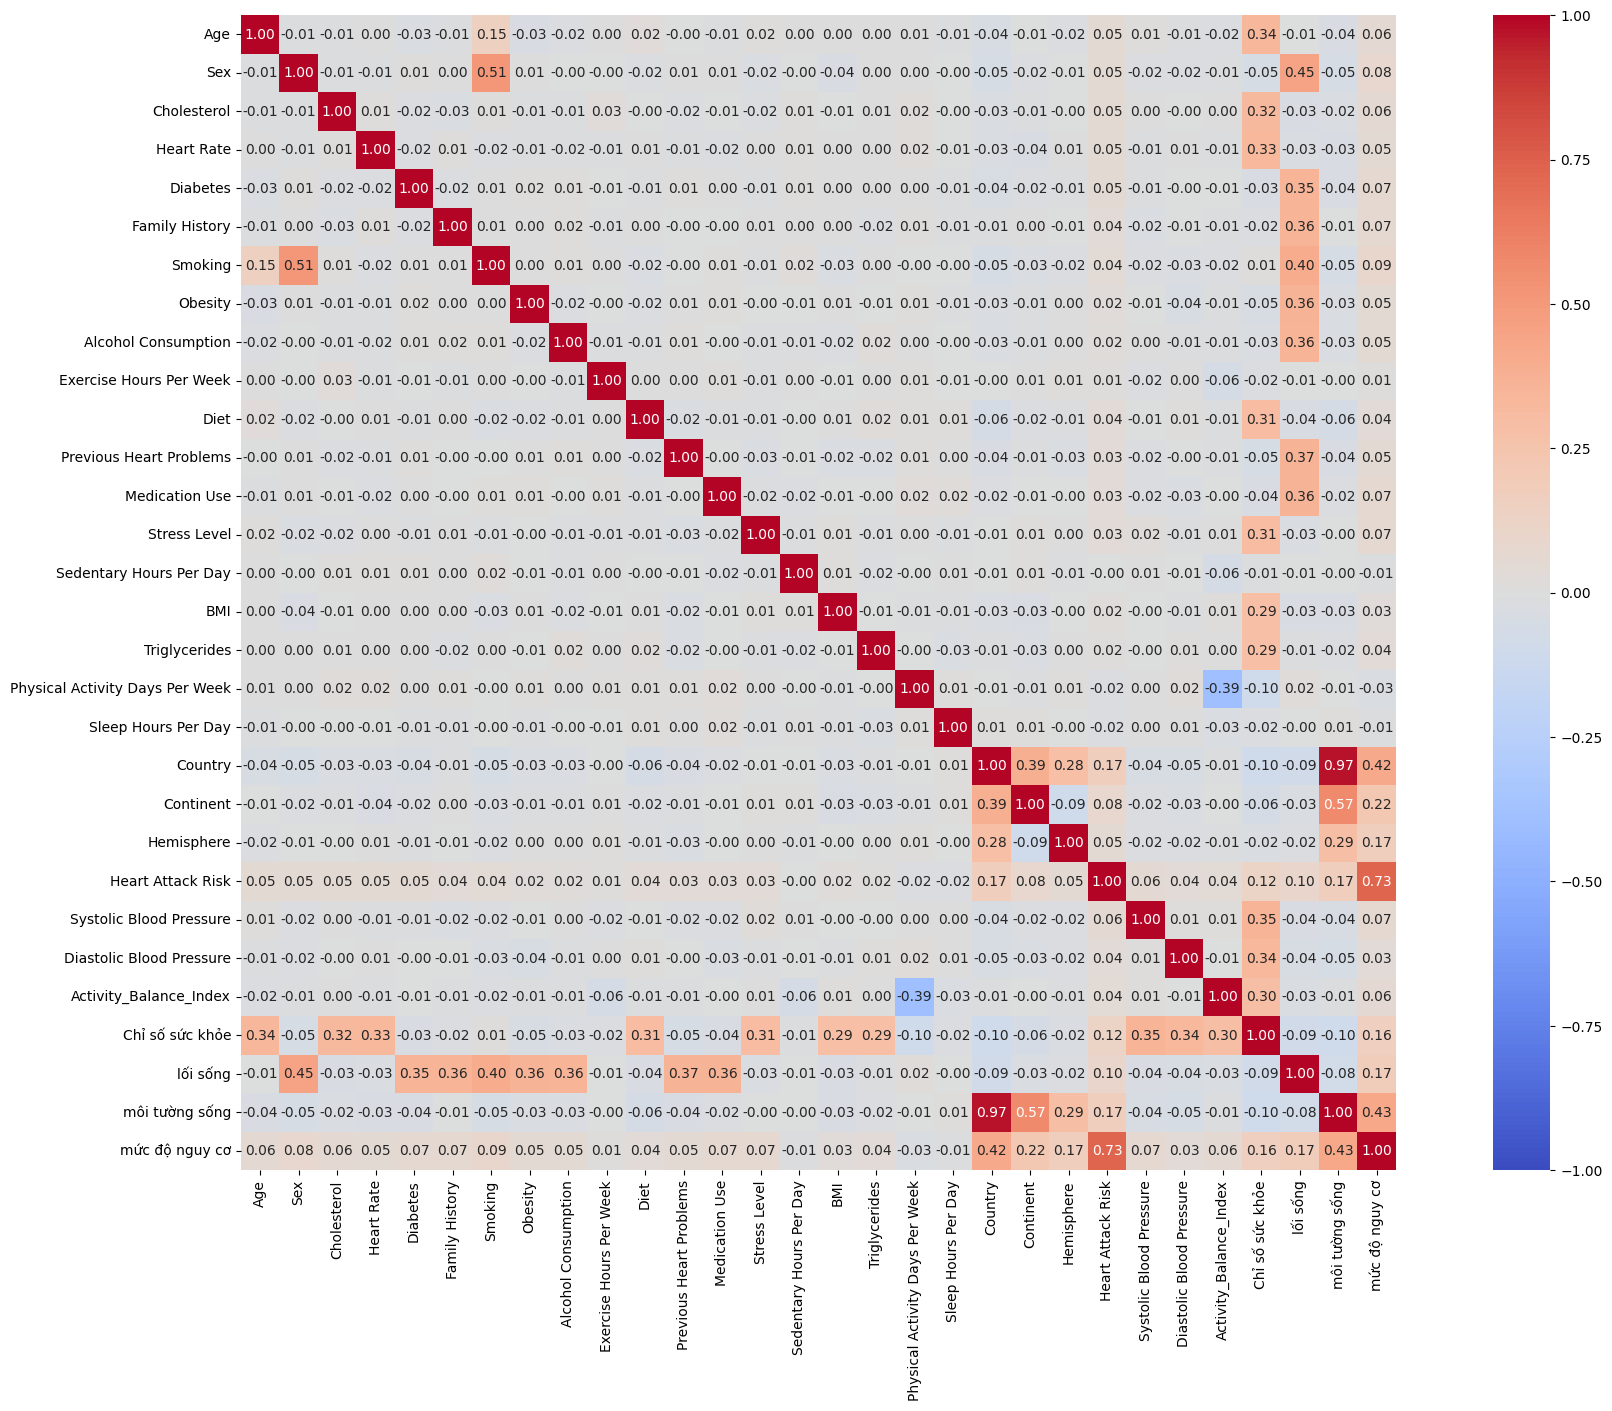

In [592]:

plt.figure(figsize=(25, 15))  # Kích thước 25x15 inch
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cmap='coolwarm')  # Sử dụng bảng màu 'coolwarm'
plt.show()


##### Xử lý ngoại lệ

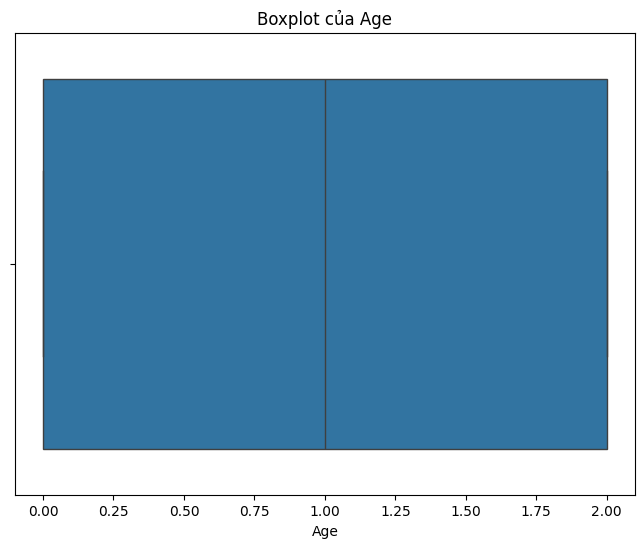

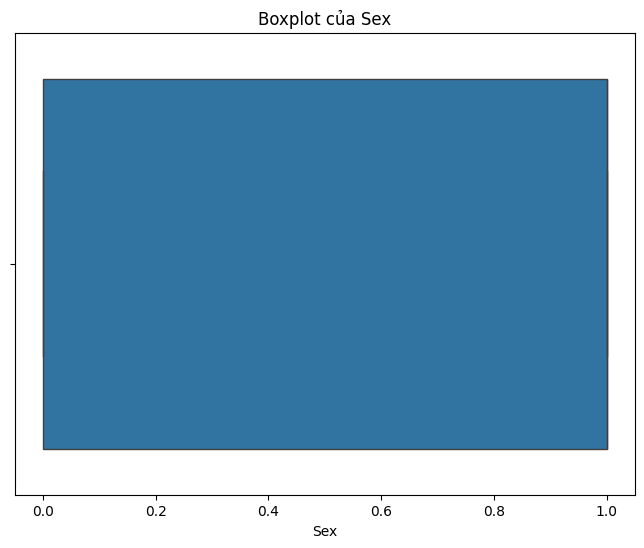

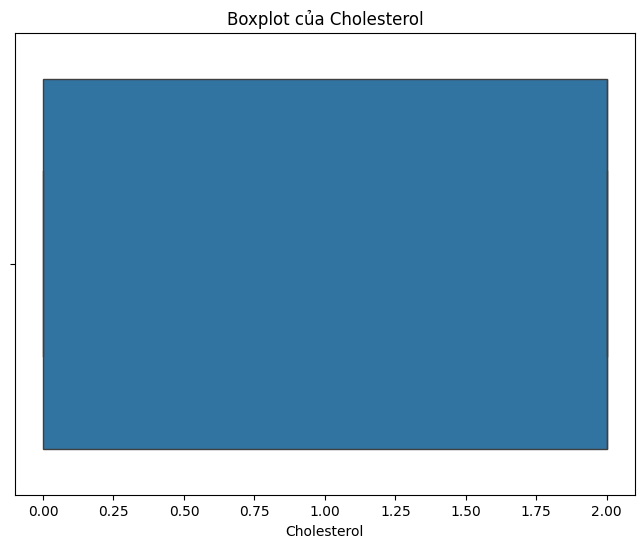

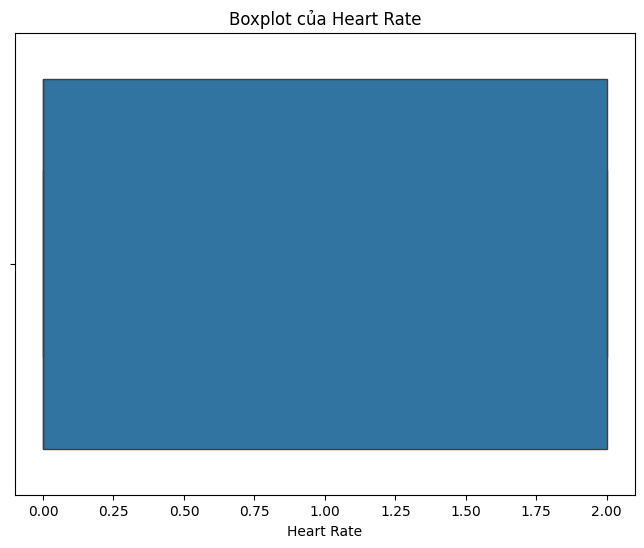

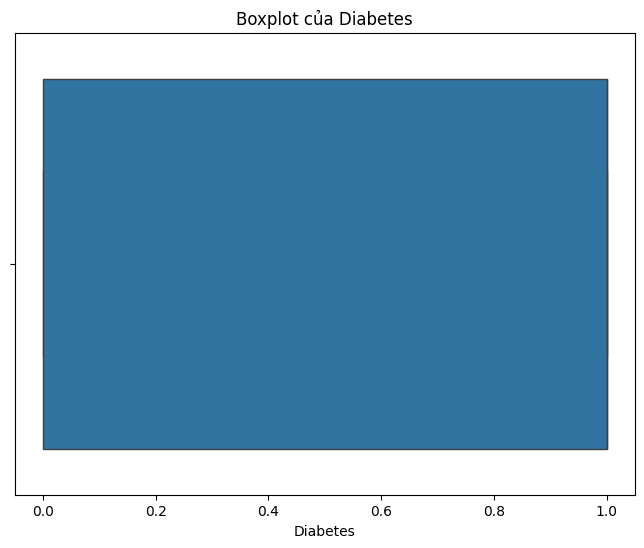

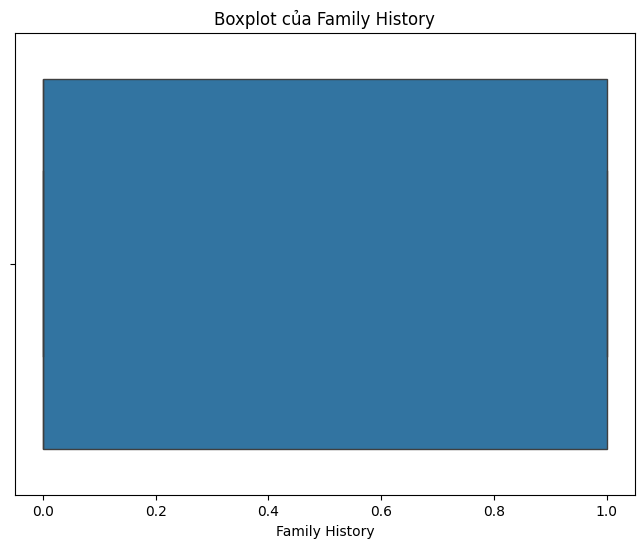

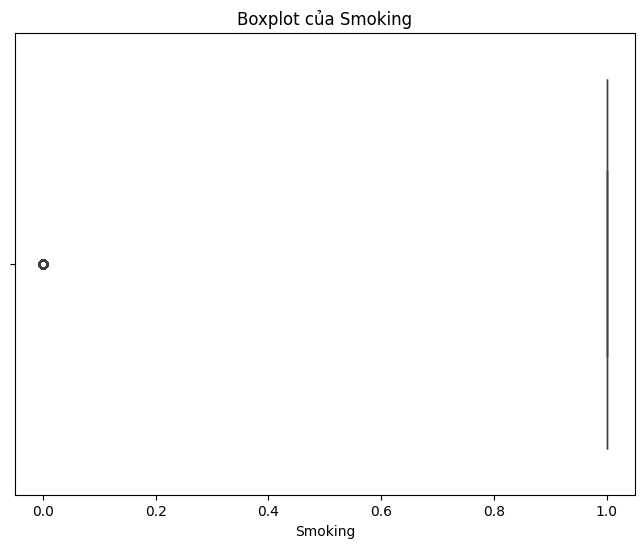

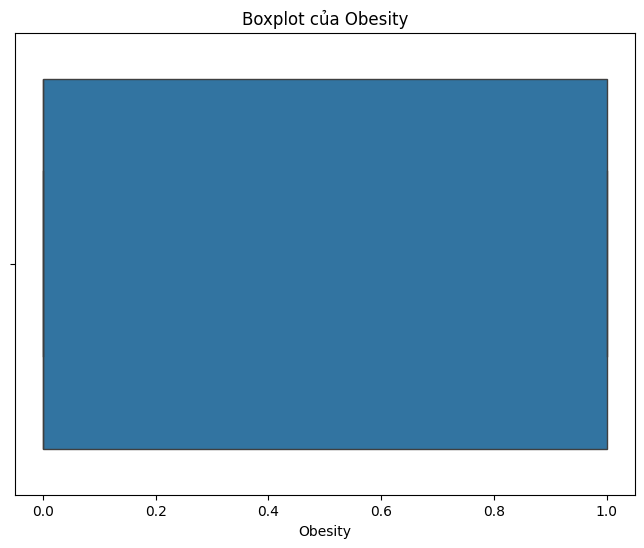

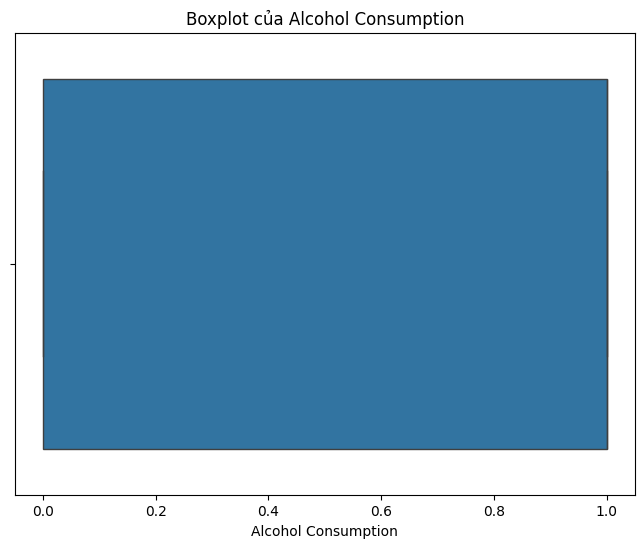

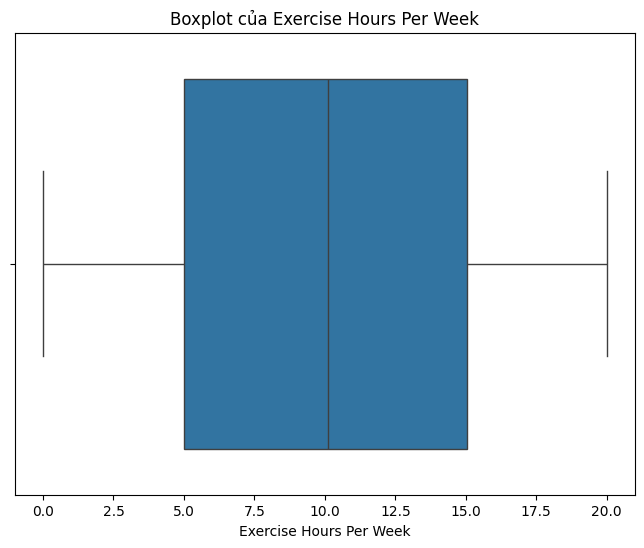

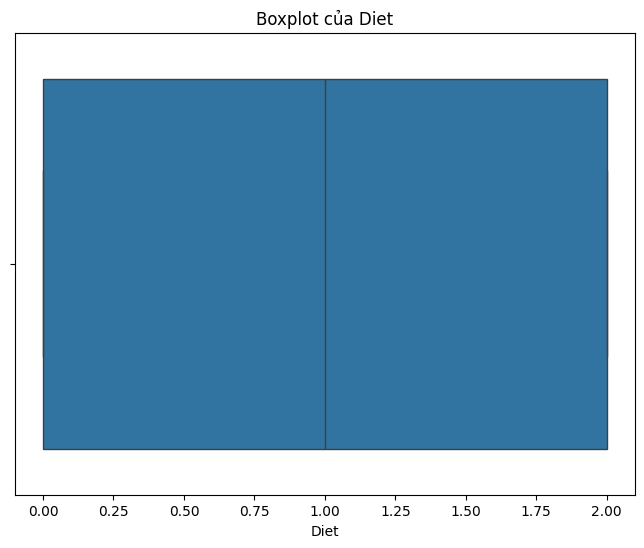

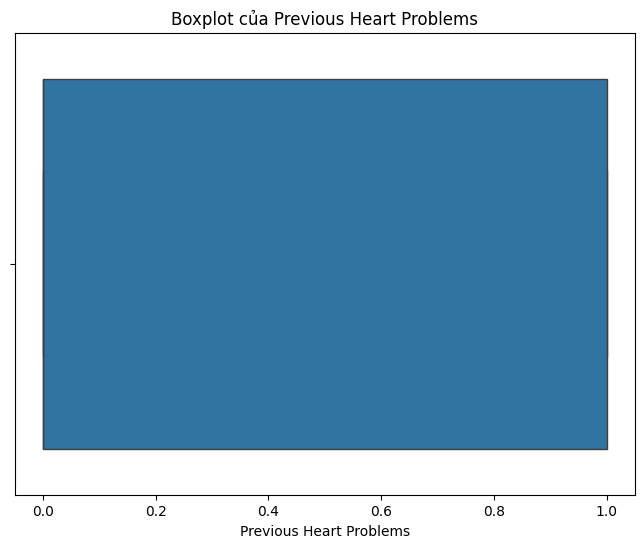

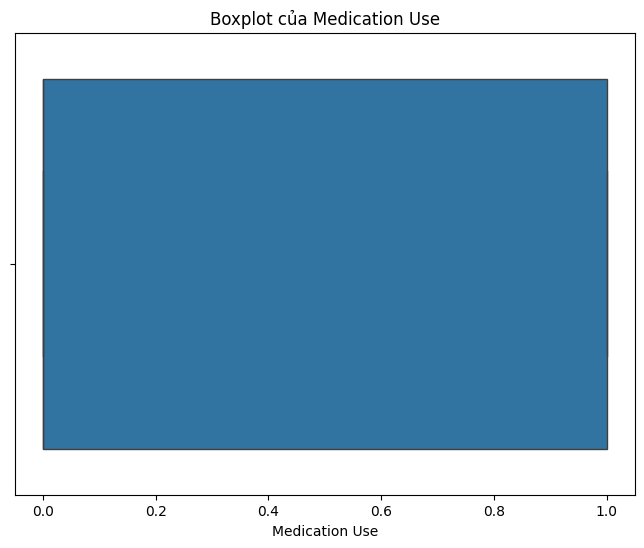

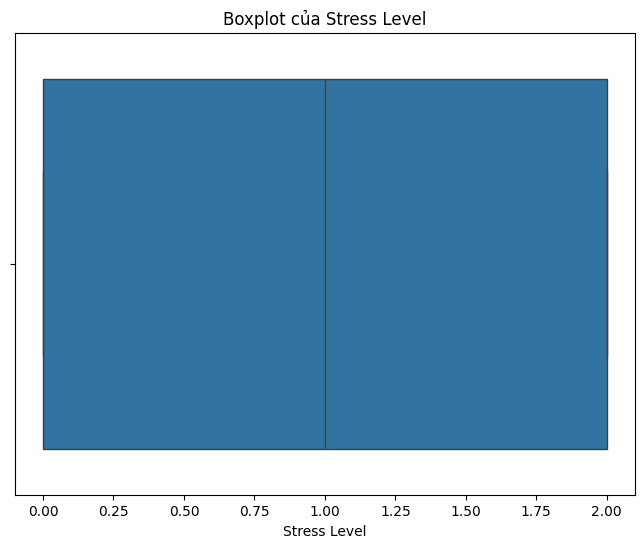

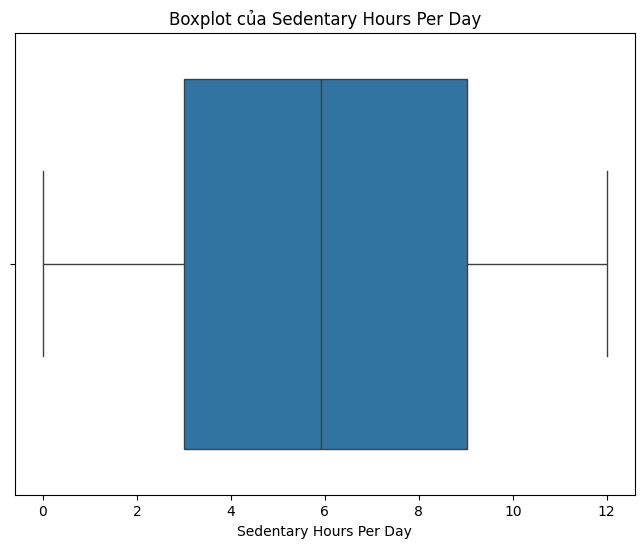

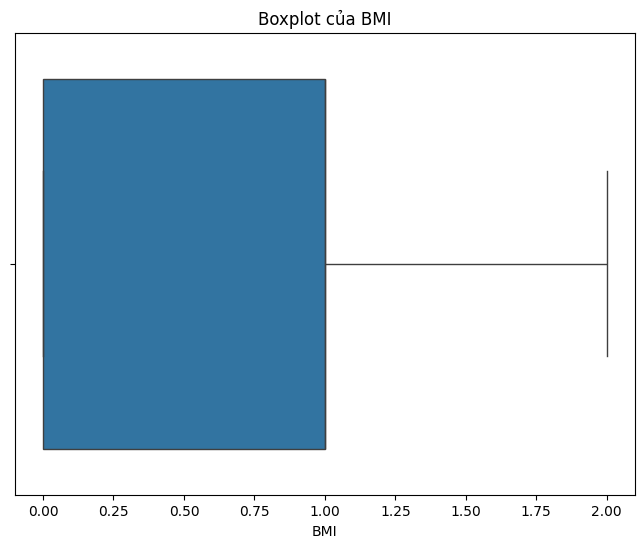

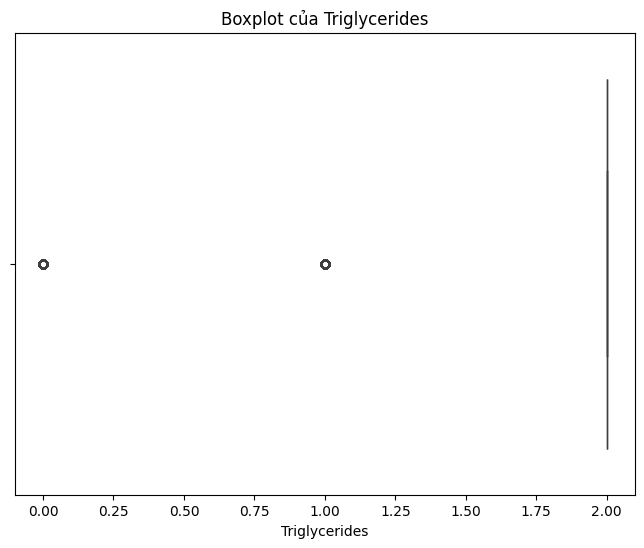

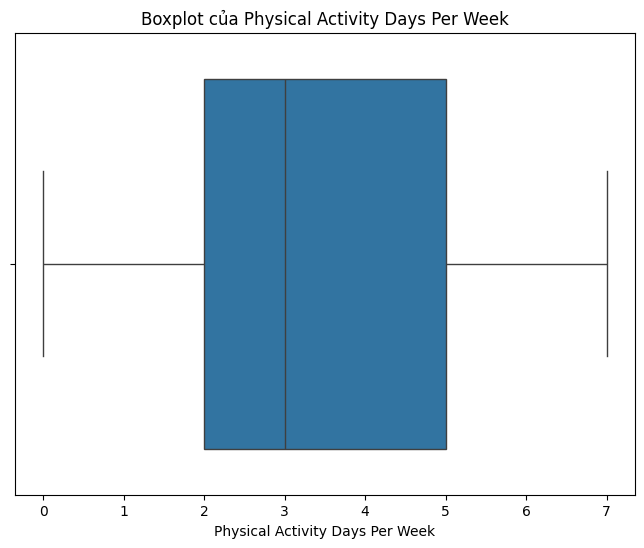

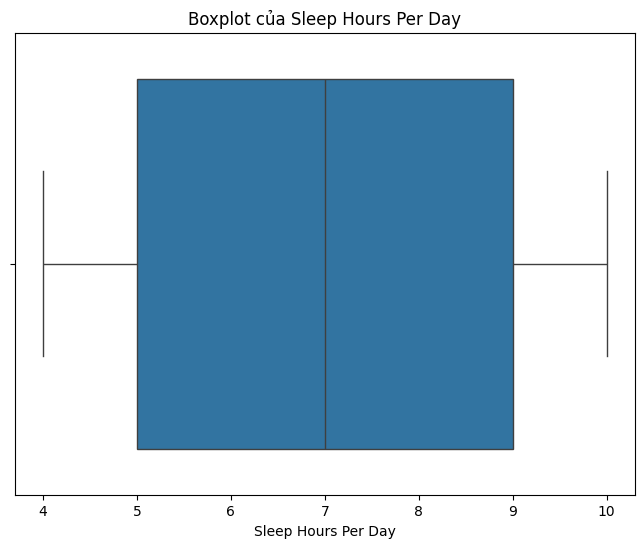

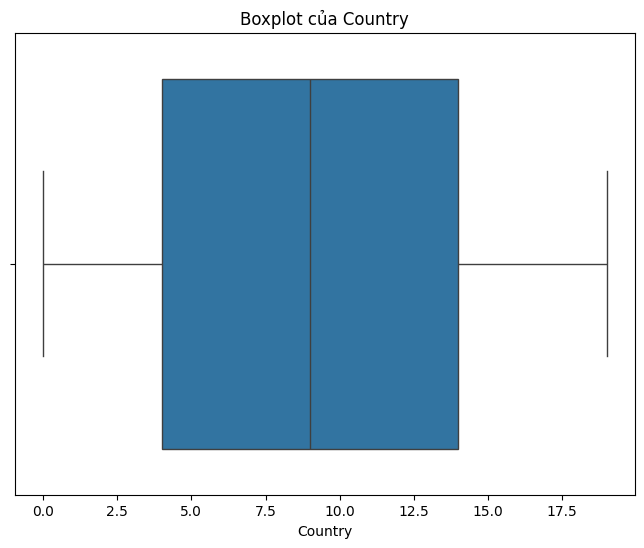

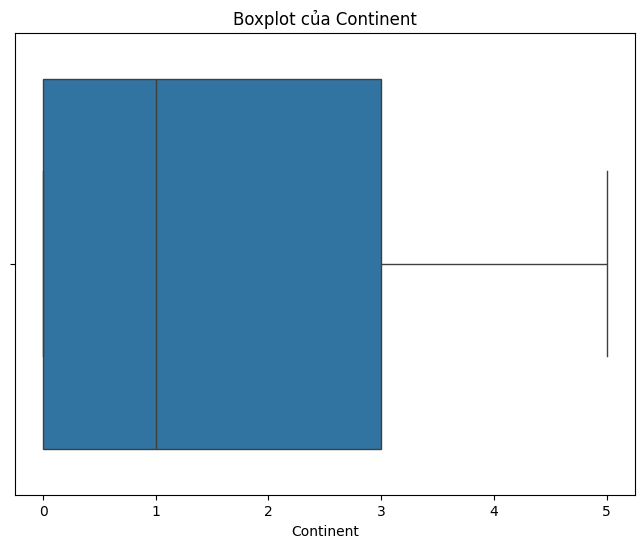

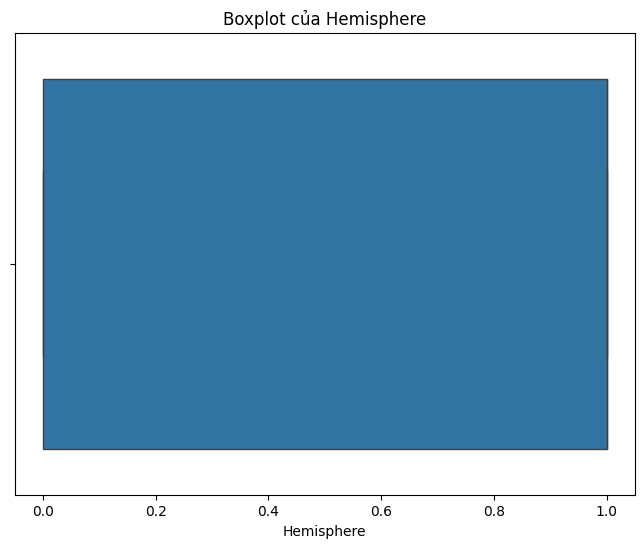

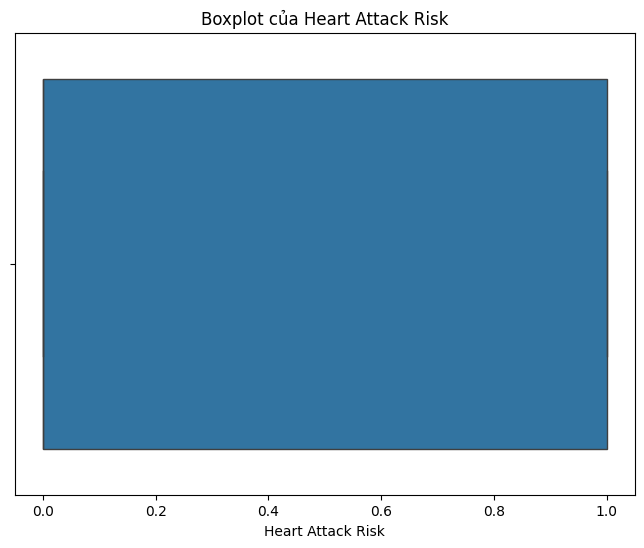

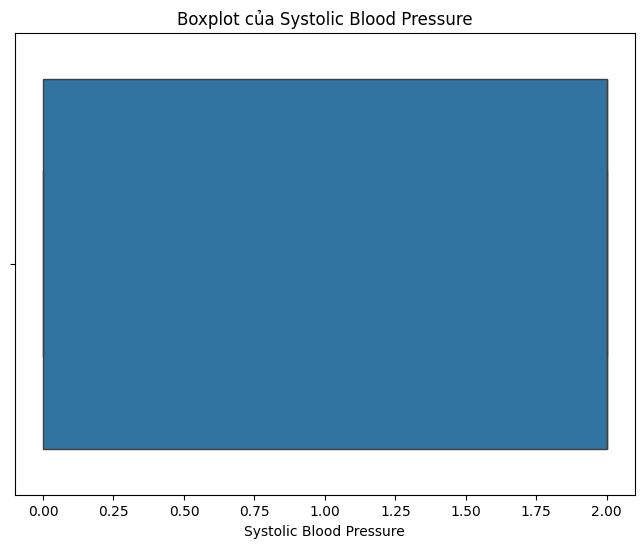

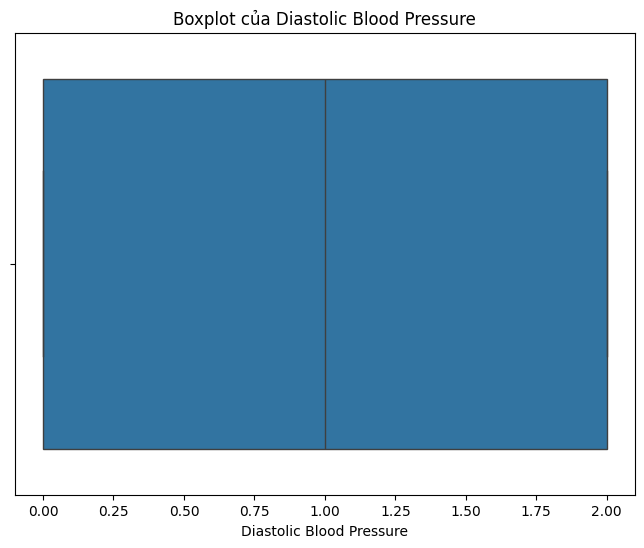

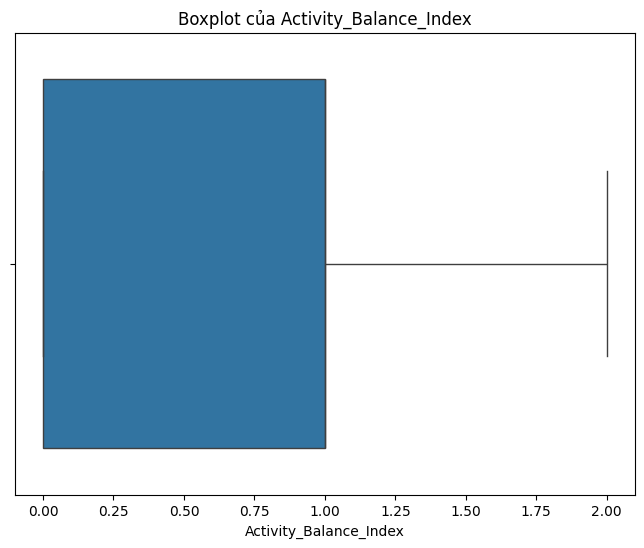

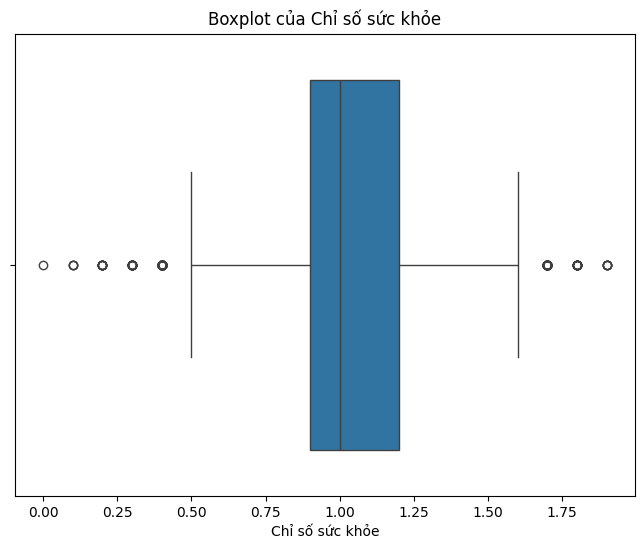

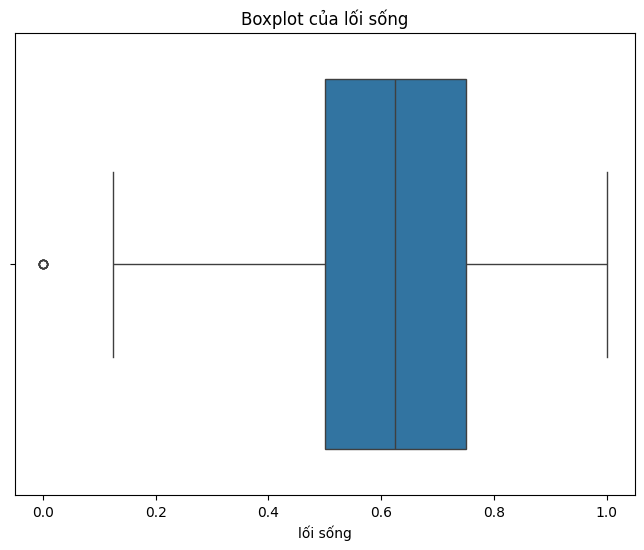

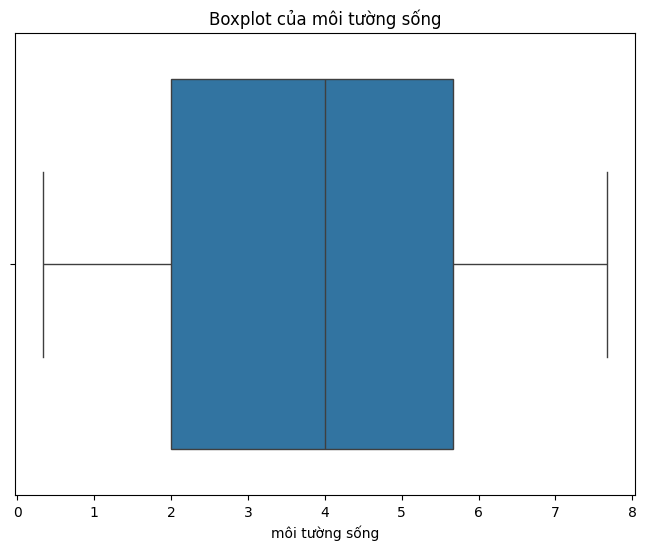

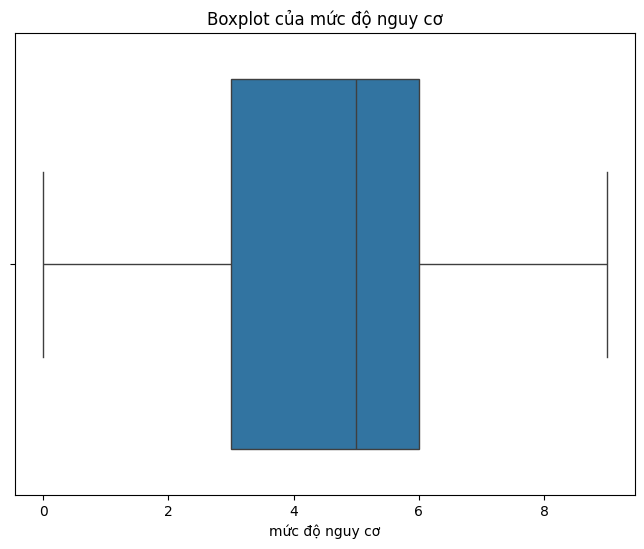

In [593]:
# Tạo biểu đồ boxplot cho từng biến số
for column in df.columns:
    if df[column].dtype in ['float64', 'int64','int32']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot của {column}')
        plt.show()

##### Cân bằng dữ liệu

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

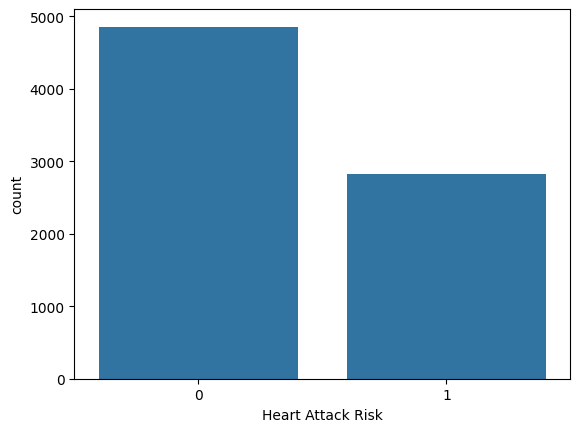

In [594]:
sns.countplot(x='Heart Attack Risk', data=df)

In [595]:
y = df[["Heart Attack Risk"]]
X = df.drop("Heart Attack Risk", axis = 1)
y["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    4856
1    2823
Name: count, dtype: int64

In [596]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_us, y_us = sm.fit_resample(X, y)

# Tạo DataFrame từ dữ liệu đã được lấy mẫu và nhãn tương ứng
df_X_us = pd.DataFrame(X_us)  
df_y_us = pd.DataFrame(y_us)
df_combined = pd.concat([df_X_us, df_y_us], axis=1)



<Axes: xlabel='Heart Attack Risk', ylabel='count'>

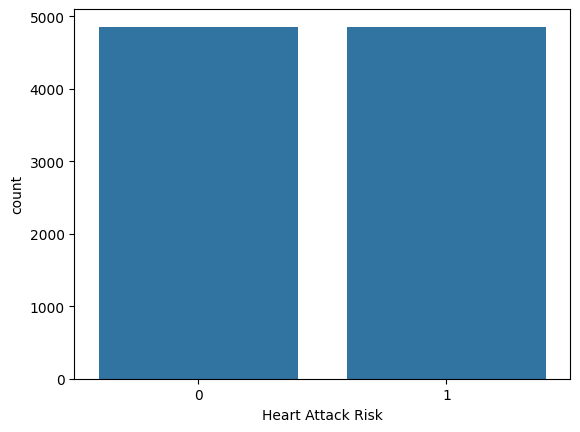

In [597]:
sns.countplot(x='Heart Attack Risk', data=y_us)

In [598]:
y_us.value_counts()

Heart Attack Risk
0                    4856
1                    4856
Name: count, dtype: int64

In [599]:
df=df_combined
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ,Heart Attack Risk
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,2,1,2,1.2,0.375,5.333333,5.0,0
1,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,2,2,0,1.4,0.250,3.000000,2.0,0
2,0,0,2,2,1,1,1,0,1,0.625008,...,0,1,2,1,0,1.2,0.625,4.333333,6.0,1
3,2,1,2,0,0,0,1,0,1,4.098177,...,5,1,0,0,0,1.1,0.500,5.666667,6.0,1
4,1,1,0,0,1,0,1,1,0,16.868302,...,3,0,2,2,1,0.9,0.625,4.000000,4.0,0


In [600]:
df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ,Heart Attack Risk
count,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,...,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000
mean,0.938633,0.665054,1.264724,0.650329,0.618101,0.443884,0.886944,0.455725,0.552718,9.996276,...,1.793245,0.624485,1.177409,0.963138,0.735791,1.042237,0.606581,3.984164,4.947718,0.500000
std,0.886484,0.471996,0.871900,0.848807,0.485877,0.496867,0.316678,0.498061,0.497239,5.771244,...,1.633398,0.484280,0.903165,0.883539,0.806219,0.263003,0.168785,2.208143,1.790478,0.500026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.961063,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.500000,2.322591,4.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.173692,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.010398,0.625000,4.000000,5.500000,0.500000
75%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.007854,...,3.000000,1.000000,2.000000,2.000000,1.000000,1.200000,0.750000,5.666667,6.000000,1.000000
max,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,...,5.000000,1.000000,2.000000,2.000000,2.000000,1.900000,1.000000,7.666667,9.000000,1.000000


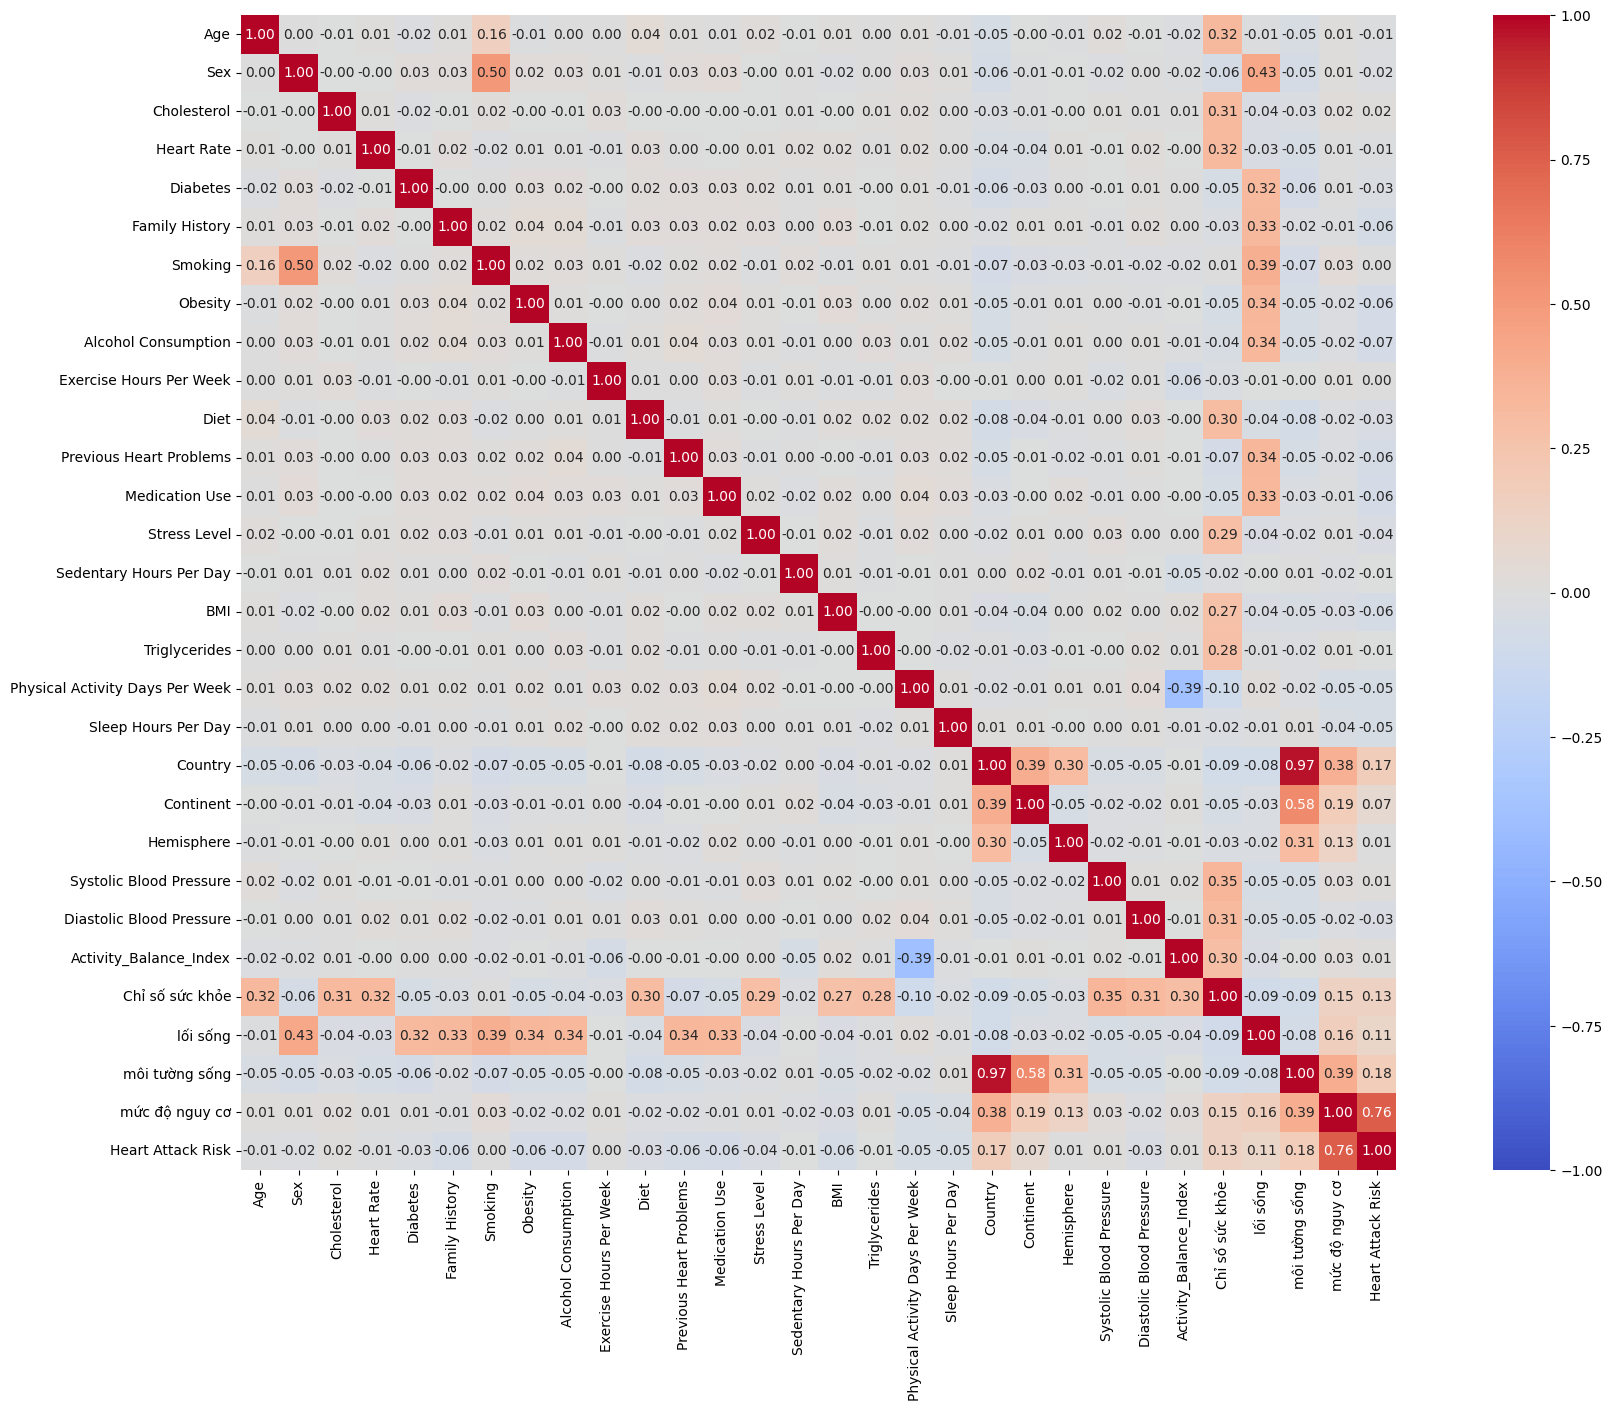

In [601]:

plt.figure(figsize=(25, 15))  # Kích thước 25x15 inch
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cmap='coolwarm')  # Sử dụng bảng màu 'coolwarm'
plt.show()


In [602]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure,Activity_Balance_Index,Chỉ số sức khỏe,lối sống,môi tường sống,mức độ nguy cơ,Heart Attack Risk
0,2,1,1,0,0,0,1,0,0,4.168189,...,3,0,2,1,2,1.200000,0.375000,5.333333,5.0,0
1,1,0,2,0,1,0,0,0,0,2.078353,...,0,1,2,2,0,1.400000,0.250000,3.000000,2.0,0
2,0,0,2,2,1,1,1,0,1,0.625008,...,0,1,2,1,0,1.200000,0.625000,4.333333,6.0,1
3,2,1,2,0,0,0,1,0,1,4.098177,...,5,1,0,0,0,1.100000,0.500000,5.666667,6.0,1
4,1,1,0,0,1,0,1,1,0,16.868302,...,3,0,2,2,1,0.900000,0.625000,4.000000,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,2,0,2,1,0,1,1,1,0,12.277987,...,1,1,2,0,1,1.281643,0.522946,2.333333,6.0,1
9708,1,1,0,2,0,0,1,1,0,18.429402,...,3,1,2,1,1,1.300000,0.637835,6.666667,6.0,1
9709,0,0,2,0,1,0,1,0,0,18.005618,...,2,0,0,0,0,0.841134,0.715722,5.333333,6.0,1
9710,1,1,2,0,1,1,1,0,1,14.875028,...,1,1,0,0,2,1.246026,0.932532,2.333333,6.0,1


##### Lưu file

In [603]:
# Lưu DataFrame thành tập tin CSV
df.to_csv('new_dataset.csv', index=False)

#### Phân tích,trực quan hóa dữ liệu

In [604]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("heart_attack_prediction_dataset.csv")


['Bin_no_1', 'Bin_no_2', 'Bin_no_3']


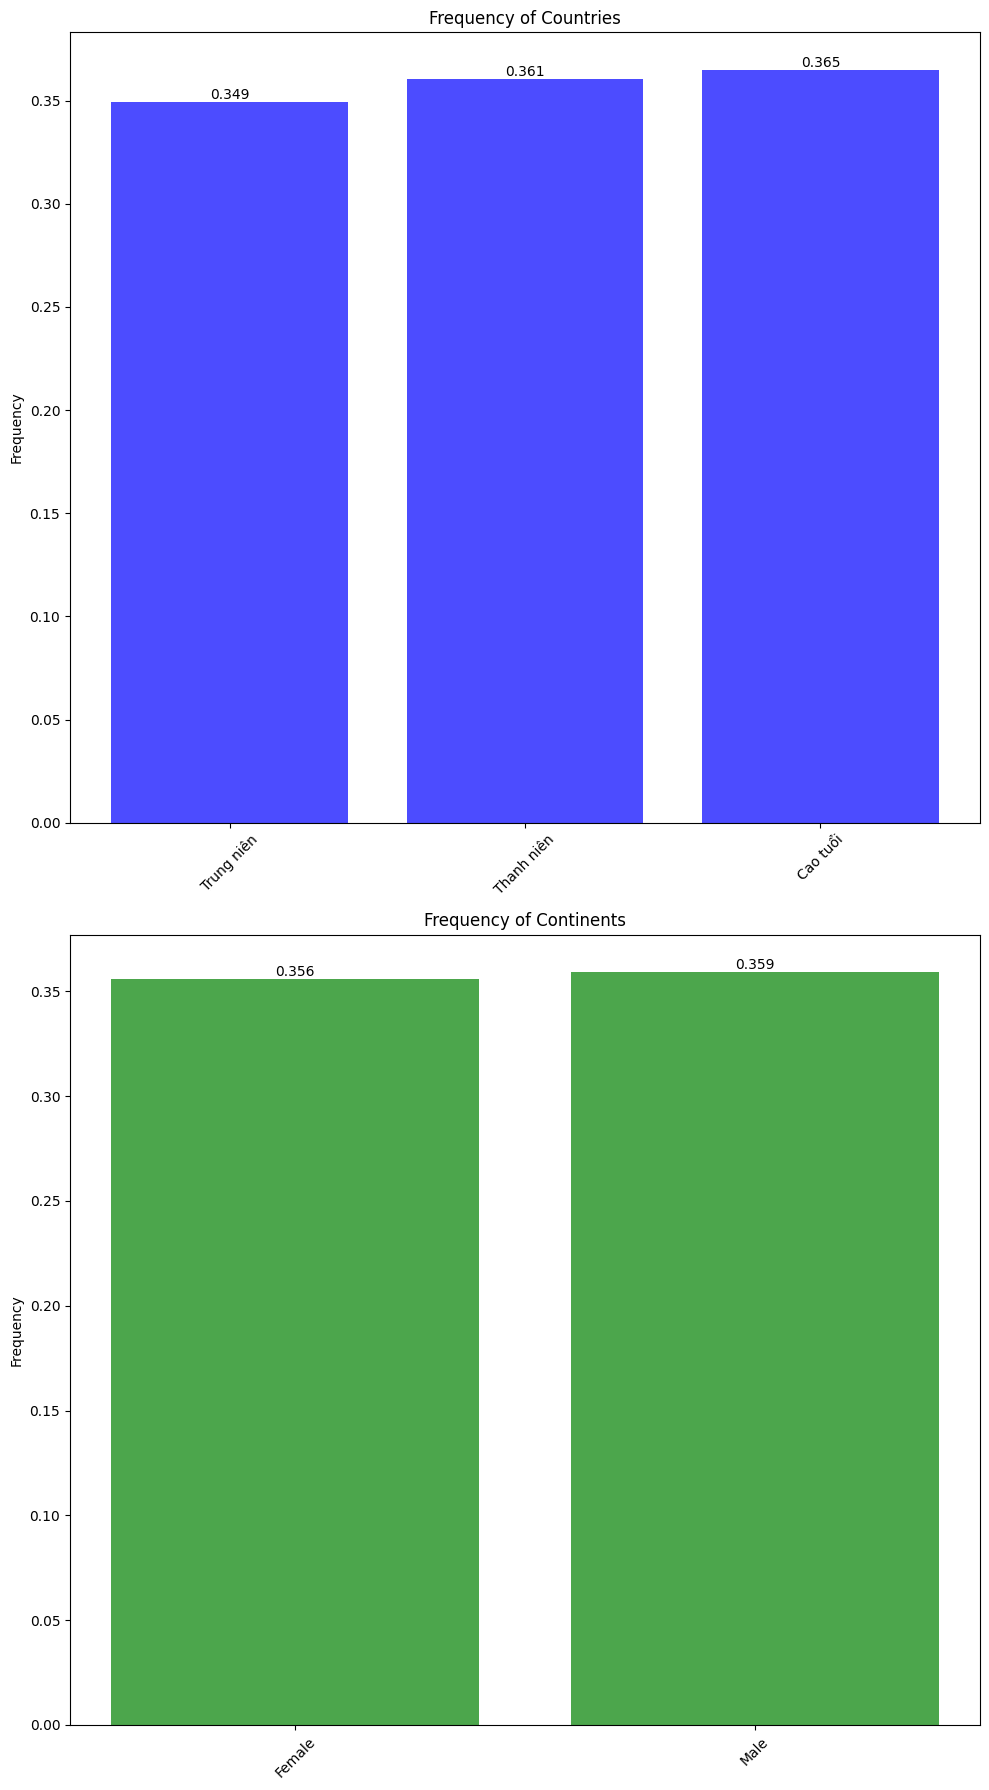

In [605]:
import matplotlib.pyplot as plt

# Tính số lần xuất hiện của mỗi quốc gia theo châu lục và bán cầu
# country_counts = df[df['Heart Attack Risk'] == 1].groupby(['Age']).size().sort_values()
# continent_counts = df[df['Heart Attack Risk'] == 1].groupby(['Sex']).size().sort_values()
discretised_age, bins = pd.qcut(df['Age'], 3, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretised_age, df['Age']], axis=1)
bin_labels = ['Bin_no_' +str(i) for i in range(1,4)]
print(bin_labels)

df['Age'] = pd.cut(x=df['Age'], bins=bins, labels=bin_labels, include_lowest=True)
df['Age'] = df['Age'].replace({'Bin_no_1': 'Thanh niên', 'Bin_no_2': 'Trung niên', 'Bin_no_3': 'Cao tuổi'})



# Tính trung bình nguy cơ bị bệnh tim của mỗi quốc gia, châu lục, bán cầu
country_counts = df.groupby(['Age'])['Heart Attack Risk'].mean().sort_values()
continent_counts = df.groupby(['Sex'])['Heart Attack Risk'].mean().sort_values()


# Tạo 3 biểu đồ
fig, axs = plt.subplots(2, 1, figsize=(10, 18))

# Biểu đồ cho số lần xuất hiện của mỗi quốc gia
axs[0].bar(country_counts.index, country_counts.values, color='b', alpha=0.7)
axs[0].set_title('Frequency of Countries')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(country_counts.values):
    axs[0].text(i, v, "{:.3f}".format(v), ha='center', va='bottom')

# Biểu đồ cho số lần xuất hiện của mỗi châu lục
axs[1].bar(continent_counts.index, continent_counts.values, color='g', alpha=0.7)
axs[1].set_title('Frequency of Continents')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(continent_counts.values):
    axs[1].text(i, v, "{:.3f}".format(v), ha='center', va='bottom')



plt.tight_layout()
plt.show()


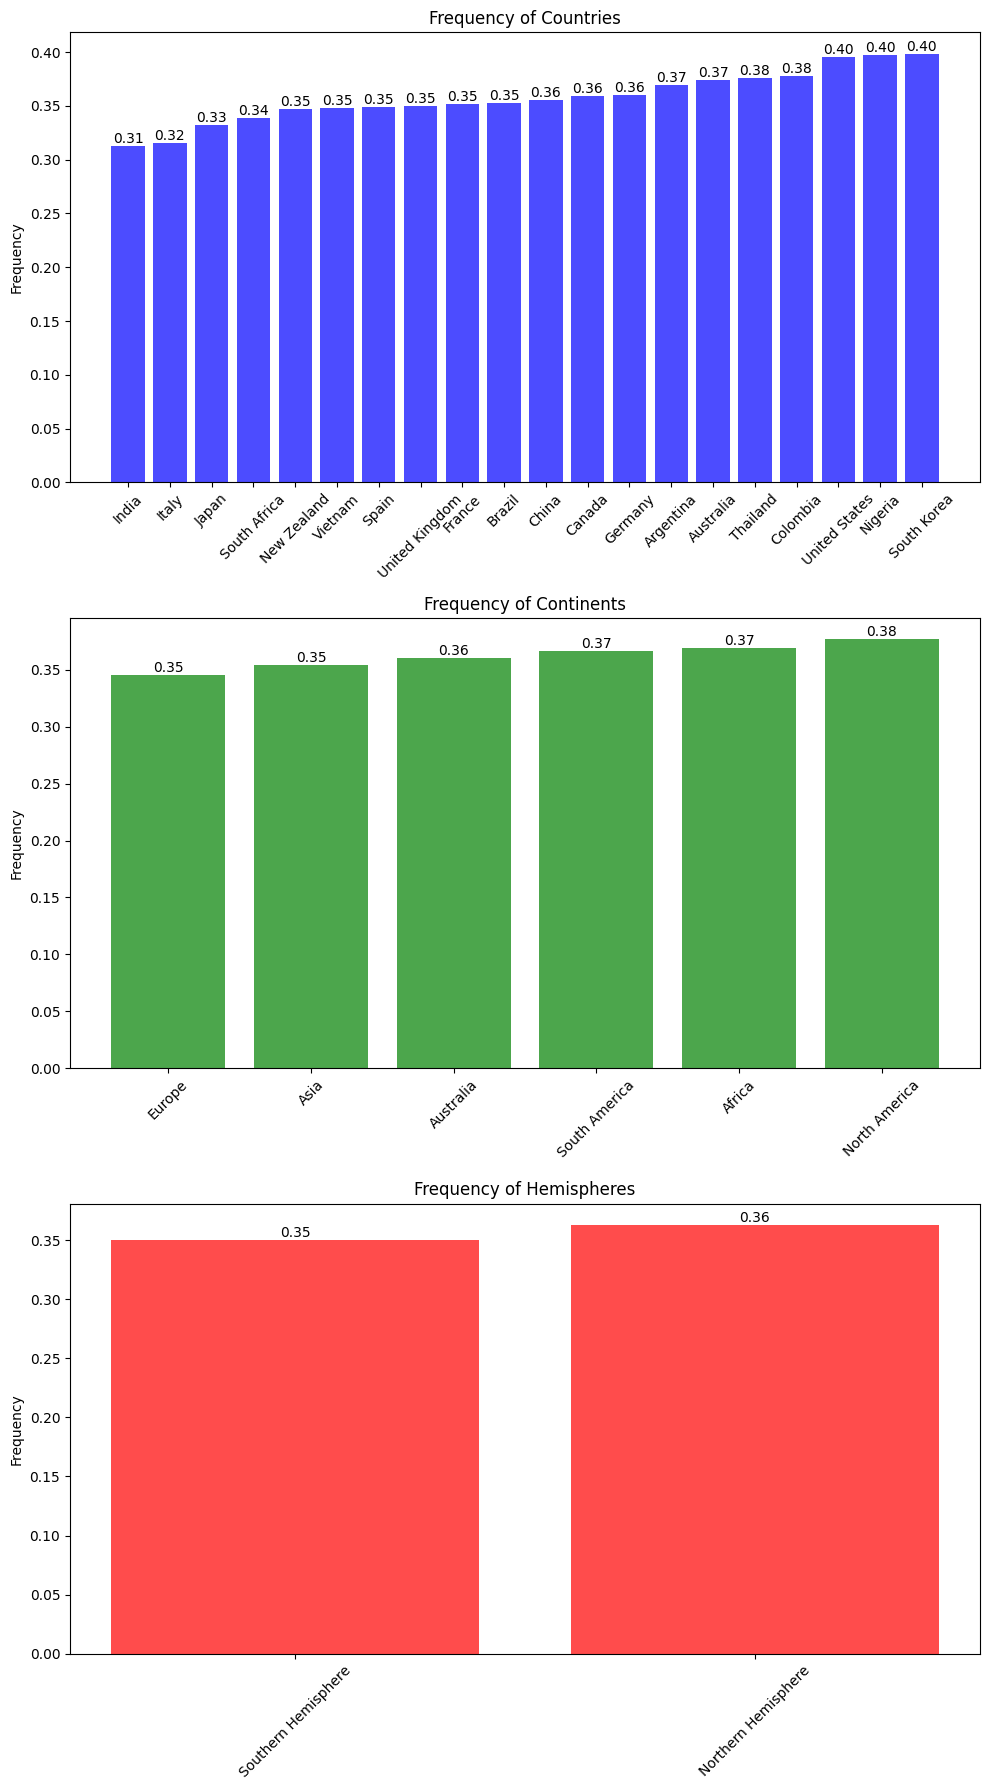

In [606]:
import matplotlib.pyplot as plt

# Tính số lần xuất hiện của mỗi quốc gia theo châu lục và bán cầu
# country_counts = df[df['Heart Attack Risk'] == 1].groupby(['Country']).size().sort_values()
# continent_counts = df[df['Heart Attack Risk'] == 1].groupby(['Continent']).size().sort_values()
# hemisphere_counts = df[df['Heart Attack Risk'] == 1].groupby(['Hemisphere']).size().sort_values()
# Tính trung bình nguy cơ bị bệnh tim của mỗi quốc gia, châu lục, bán cầu
country_counts = df.groupby(['Country'])['Heart Attack Risk'].mean().sort_values()
continent_counts = df.groupby(['Continent'])['Heart Attack Risk'].mean().sort_values()
hemisphere_counts = df.groupby(['Hemisphere'])['Heart Attack Risk'].mean().sort_values()

# Tạo 3 biểu đồ
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Biểu đồ cho số lần xuất hiện của mỗi quốc gia
axs[0].bar(country_counts.index, country_counts.values, color='b', alpha=0.7)
axs[0].set_title('Frequency of Countries')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(country_counts.values):
    axs[0].text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

# Biểu đồ cho số lần xuất hiện của mỗi châu lục
axs[1].bar(continent_counts.index, continent_counts.values, color='g', alpha=0.7)
axs[1].set_title('Frequency of Continents')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(continent_counts.values):
    axs[1].text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

# Biểu đồ cho số lần xuất hiện của mỗi bán cầu
axs[2].bar(hemisphere_counts.index, hemisphere_counts.values, color='r', alpha=0.7)
axs[2].set_title('Frequency of Hemispheres')
axs[2].set_ylabel('Frequency')
axs[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(hemisphere_counts.values):
    axs[2].text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Mô hình

#### Xây dựng mô hình

##### Học máy

**Perceptron**

In [607]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_csv('new_dataset.csv')


X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']




X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,shuffle=True,random_state=42)


perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)  

# Make predictions on the test set
y_pred = perceptron_model.predict(X_test)

# Print evaluation metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
from sklearn.metrics import accuracy_score, confusion_matrix

# Hàm tính toán các độ đo đáng giá hiệu suất
def evaluate_performance(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn)
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Precision
    precision = tp / (tp + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # F1-Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity,npv, fpr, fdr, fnr, mcc


specificity,npv, fpr, fdr, fnr,mcc = evaluate_performance(y_test, y_pred)





print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)

print("MCC:", mcc)

Accuracy Score: 0.9993136582017845
Precision Score: 0.9993136582017845
Recall Score: 0.9993136582017845
F1 Score: 0.9993136582017845
NPV: 0.9993256911665542
FPR: 0.0006743088334457181
FDR: 0.0006988120195667365
FNR: 0.0006988120195667365
MCC: 0.9986268791469876


In [608]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from gridsearchCV import perform_grid_search
# Load the dataset
df = pd.read_csv('new_dataset.csv')

X_data = df.iloc[:, :-1]
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 300, 400, 500]
}

# Create an instance of the model
perceptron = Perceptron()

# Create GridSearchCV
grid_search,perceptron, best_params, best_score = perform_grid_search(perceptron, param_grid, X_train,y_train)

y_pred=perceptron.predict(X_test)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

print(perceptron)
accuracy_perceptron=accuracy_score(y_test, y_pred)
precision_perceptron=metrics.precision_score(y_test, y_pred, average='micro')
recall_perceptron=metrics.recall_score(y_test, y_pred, average='micro')
f1_perceptron= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_perceptron)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))


def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Best Parameters: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1'}
Best Score: 1.0
Perceptron(alpha=0.001, max_iter=100, penalty='l1')
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


**SVM**

In [609]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics


df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,shuffle=True,random_state=42)


svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)  


y_pred = svm_model.predict(X_test)


accuracy_svm=accuracy_score(y_test, y_pred)
precision_svm=metrics.precision_score(y_test, y_pred, average='micro')
recall_svm=metrics.recall_score(y_test, y_pred, average='micro')
f1_svm= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_svm)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


**ID3**

In [610]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,shuffle=True,random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)


y_pred = decision_tree_model.predict(X_test)


accuracy_id3=accuracy_score(y_test, y_pred)
precision_id3=metrics.precision_score(y_test, y_pred, average='micro')
recall_id3=metrics.recall_score(y_test, y_pred, average='micro')
f1_id3= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_id3)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)



Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


**Logistic**

In [611]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)


y_pred = logistic_model.predict(X_test)


accuracy_logistic=accuracy_score(y_test, y_pred)
precision_logistic=metrics.precision_score(y_test, y_pred, average='micro')
recall_logistic=metrics.recall_score(y_test, y_pred, average='micro')
f1_logistic= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_logistic)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)




Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


**Neural Network**

In [612]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42)


MLP_model = MLPClassifier(random_state=42)
MLP_model.fit(X_train, y_train)
y_pred = MLP_model.predict(X_test)




accuracy_MLP=accuracy_score(y_test, y_pred)
precision_MLP=metrics.precision_score(y_test, y_pred, average='micro')
recall_MLP=metrics.recall_score(y_test, y_pred, average='micro')
f1_MLP= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_MLP)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


**KNeighbors**

In [613]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from gridsearchCV import perform_grid_search

# Load the dataset
df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)



# Create an instance of the model
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

# Predict on test set using the best model
y_pred = knn.predict(X_test)

accuracy_kn=accuracy_score(y_test, y_pred)
precision_kn=metrics.precision_score(y_test, y_pred, average='micro')
recall_kn=metrics.recall_score(y_test, y_pred, average='micro')
f1_kn= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_kn)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)





Accuracy Score: 0.8363074811256005
Precision Score: 0.8363074811256005
Recall Score: 0.8363074811256005
F1 Score: 0.8363074811256005
NPV: 0.8954402515723271
FPR: 0.23196223870532703
FDR: 0.2095006090133983
FNR: 0.09294199860237597
MCC: 0.6804961029676817


In [614]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from gridsearchCV import perform_grid_search

# Load the dataset
df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40]
}

# Create an instance of the model
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search,KNeighbors, best_params, best_score = perform_grid_search(knn,param_grid,X_train,y_train)



# Predict on test set using the best model
y_pred = KNeighbors.predict(X_test)

# Print evaluation metrics
print('Best Parameters:', best_params)
print('Best Score:', best_score)
accuracy_kn=accuracy_score(y_test, y_pred)
precision_kn=metrics.precision_score(y_test, y_pred, average='micro')
recall_kn=metrics.recall_score(y_test, y_pred, average='micro')
f1_kn= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_kn)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)





Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8870257109466303
Accuracy Score: 0.8901853122855182
Precision Score: 0.8901853122855182
Recall Score: 0.8901853122855182
F1 Score: 0.8901853122855182
NPV: 0.9483423284502699
FPR: 0.1706001348617667
FDR: 0.1564625850340136
FNR: 0.04682040531097135
MCC: 0.7872158673774587


**AdaBoost**

In [615]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('new_dataset.csv')

X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42)


adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)




accuracy_adaboost=accuracy_score(y_test, y_pred)
precision_adaboost=metrics.precision_score(y_test, y_pred, average='micro')
recall_adaboost=metrics.recall_score(y_test, y_pred, average='micro')
f1_adaboost= metrics.f1_score(y_test, y_pred, average='micro')
# Print evaluation metrics
print('Accuracy Score:', accuracy_adaboost)
print('Precision Score:', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', metrics.f1_score(y_test, y_pred, average='micro'))
def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)







Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


##### Học sâu

**LSTM**

In [616]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
df = pd.read_csv('new_dataset.csv')

# Split features and labels
X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

# mảng 3 chiều với hình dạng (số_mẫu, số_bước_thời_gian, số_đặc_trưng)
# Assuming each sample is a sequence of length 1 (no actual time steps)
X_data = X_data.values.reshape((X_data.shape[0], 1, X_data.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Build the LSTM model
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
LSTM.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy_lstm = LSTM.evaluate(X_test, y_test)
print("Accuracy on test set:", accuracy_lstm)

# Predict on the test set
y_pred_prob = LSTM.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate additional evaluation metrics
precision_lstm = precision_score(y_test, y_pred)
recall_lstm = recall_score(y_test, y_pred)
f1_lstm = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn)

# False Positive Rate (FPR)
fpr = fp / (fp + tn)

# False Discovery Rate (FDR)
fdr = fp / (fp + tp)

# False Negative Rate (FNR)
fnr = fn / (fn + tp)

# Matthews correlation coefficient (MCC)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Print additional evaluation metrics
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1 Score:", f1_lstm)
print("Specificity:", specificity)
print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Epoch 1/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7321 - loss: 0.5109 - val_accuracy: 0.9722 - val_loss: 0.1297
Epoch 2/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.1102 - val_accuracy: 0.9983 - val_loss: 0.0419
Epoch 3/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9974 - loss: 0.0367 - val_accuracy: 0.9997 - val_loss: 0.0135
Epoch 4/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 5/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0030
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0031
Accuracy on test set: 1.0
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


##### học kết hợp

**Stacking**

In [617]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv('new_dataset.csv')

# Prepare the data
X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True, random_state=42)


# Define the stacking ensemble
stacking = StackingClassifier(
    estimators=[
        ('perceptron', Perceptron()),
        ('svm', SVC(probability=True)),
        ('decision_tree', DecisionTreeClassifier()),
        ('mlp',MLPClassifier()),
        ('KNN',KNeighborsClassifier()),
        
    ],
    final_estimator=LogisticRegression()
)

# Fit the stacking ensemble
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
accuracy_stacking=accuracy_score(y_test, y_pred_stacking)
precision_stacking=metrics.precision_score(y_test, y_pred_stacking, average='micro')
recall_stacking=metrics.recall_score(y_test, y_pred_stacking, average='micro')
f1_stacking= metrics.f1_score(y_test, y_pred_stacking, average='micro')
# Evaluate Stacking
print('Stacking Accuracy:', metrics.accuracy_score(y_test, y_pred_stacking))
print('Stacking Precision:', metrics.precision_score(y_test, y_pred_stacking, average='micro'))
print('Stacking Recall:', metrics.recall_score(y_test, y_pred_stacking, average='micro'))
print('Stacking F1 Score:', metrics.f1_score(y_test, y_pred_stacking, average='micro'))




def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred_stacking)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Stacking Accuracy: 1.0
Stacking Precision: 1.0
Stacking Recall: 1.0
Stacking F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


**Voting**

In [618]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv('new_dataset.csv')

# Prepare the data
X_data = df.drop(columns=['Heart Attack Risk'])
y_data = df['Heart Attack Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True, random_state=42)


# Khởi tạo mô hình VotingClassifier với các mô hình cơ sở
voting_model = VotingClassifier(estimators=[
    ('perceptron', Perceptron()),
        ('svm', SVC(probability=True)),
        ('decision_tree', DecisionTreeClassifier()),
        ('mlp',MLPClassifier()),
        ('KNN',KNeighborsClassifier()),
        ('LogisticRegression',LogisticRegression())
], voting='hard')  # 'hard' voting: lấy dự đoán của mỗi mô hình và đưa ra quyết định bằng cách đa số

# Huấn luyện mô hình
voting_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_voting = voting_model.predict(X_test)

# Đánh giá hiệu suất của mô hình VotingClassifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting=metrics.precision_score(y_test, y_pred_voting, average='micro')
recall_voting=metrics.recall_score(y_test, y_pred_voting, average='micro')
f1_voting= metrics.f1_score(y_test, y_pred_voting, average='micro')
# Evaluate Stacking
print('Voting Accuracy:', metrics.accuracy_score(y_test, y_pred_voting))
print('Voting Precision:', metrics.precision_score(y_test, y_pred_voting, average='micro'))
print('Voting Recall:', metrics.recall_score(y_test, y_pred_voting, average='micro'))
print('Voting F1 Score:', metrics.f1_score(y_test, y_pred_voting, average='micro'))




def evaluate_performance(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Specificity
    specificity = tn / (tn + fp)
    
    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn)
    
    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # False Discovery Rate (FDR)
    fdr = fp / (fp + tp)
    
    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    
    # Matthews correlation coefficient (MCC)
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    
    return specificity, npv, fpr, fdr, fnr, mcc

specificity, npv, fpr, fdr, fnr, mcc = evaluate_performance(y_test, y_pred_voting)

print("NPV:", npv)
print("FPR:", fpr)
print("FDR:", fdr)
print("FNR:", fnr)
print("MCC:", mcc)


Voting Accuracy: 1.0
Voting Precision: 1.0
Voting Recall: 1.0
Voting F1 Score: 1.0
NPV: 1.0
FPR: 0.0
FDR: 0.0
FNR: 0.0
MCC: 1.0


#### Đánh giá mô hình

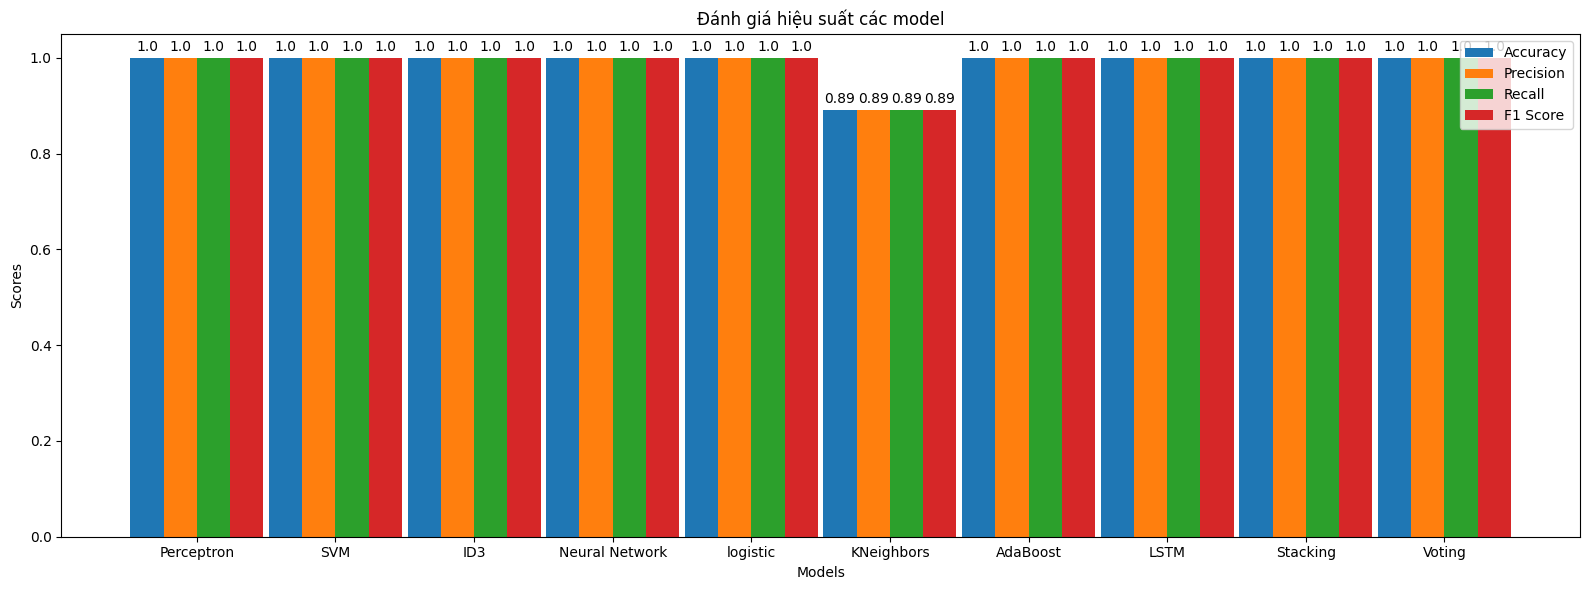

In [619]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu giả lập về các mô hình và các metric
models = ['Perceptron', 'SVM', 'ID3', 'Neural Network', 'logistic','KNeighbors','AdaBoost','LSTM','Stacking','Voting']
accuracy = [accuracy_perceptron, accuracy_svm, accuracy_id3,accuracy_MLP, accuracy_logistic,round(accuracy_kn,2),accuracy_adaboost,accuracy_lstm,accuracy_stacking,accuracy_voting]
precision = [precision_perceptron, precision_svm, precision_id3,precision_MLP, precision_logistic,round(precision_kn,2),precision_adaboost,precision_lstm,precision_stacking,precision_voting]
recall = [recall_perceptron, recall_svm,recall_id3,recall_MLP, recall_logistic,round(recall_kn,2),recall_adaboost,recall_lstm,recall_stacking,recall_voting]
f1_score = [f1_perceptron, f1_svm, f1_id3,f1_MLP, f1_logistic,round(f1_kn,2),f1_adaboost,f1_lstm,f1_stacking,f1_voting]

# Tạo một biểu đồ
x = np.arange(len(models))  # Tạo các vị trí trên trục x
width = 0.24  # Độ rộng của mỗi thanh

fig, ax = plt.subplots(figsize=(16, 6))

# Vẽ các thanh cho từng metric
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score')

# Thêm các thông tin cho biểu đồ
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Đánh giá hiệu suất các model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị trên đầu các thanh
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


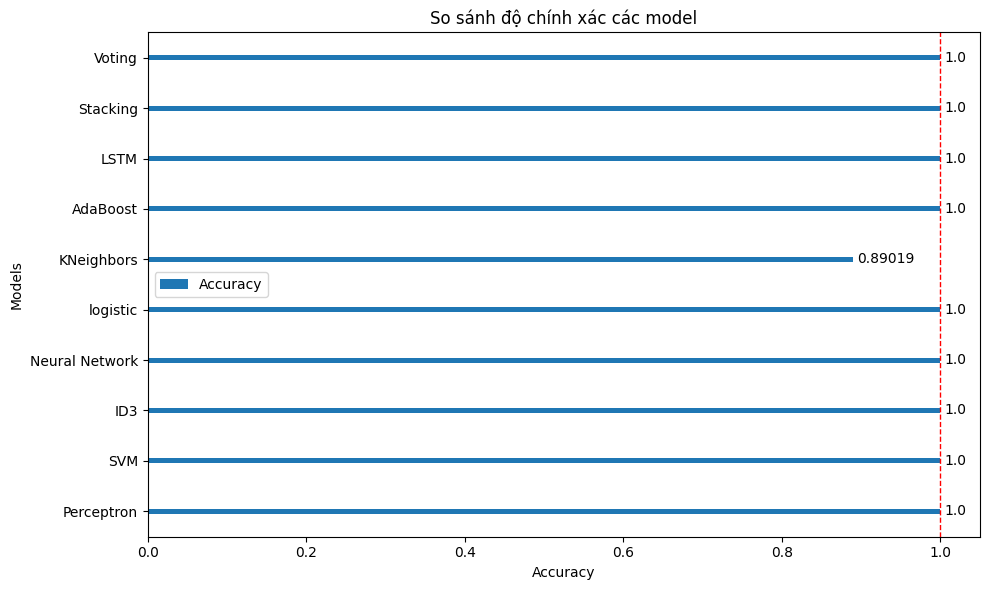

In [620]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu giả lập về các mô hình và độ chính xác
models = ['Perceptron', 'SVM', 'ID3','Neural Network', 'logistic','KNeighbors','AdaBoost','LSTM','Stacking','Voting']
accuracy = [accuracy_perceptron, accuracy_svm, accuracy_id3,accuracy_MLP,accuracy_logistic,round(accuracy_kn,5),
            accuracy_adaboost,accuracy_lstm, accuracy_stacking,accuracy_voting]  # Thay thế bằng các biến accuracy_perceptron, accuracy_svm nếu cần

# Tạo một biểu đồ
y = np.arange(len(models))  # Tạo các vị trí trên trục y
width = 0.1  # Độ rộng của mỗi thanh

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các thanh cho độ chính xác
rects = ax.barh(y, accuracy, width, label='Accuracy')

# Thêm các thông tin cho biểu đồ
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('So sánh độ chính xác các model')
ax.set_yticks(y)
ax.set_yticklabels(models)
ax.legend()

# Hiển thị giá trị trên đầu các thanh
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(rects)

# Kẻ vạch dọc cho model có độ chính xác cao nhất
max_accuracy = max(accuracy)
ax.axvline(max_accuracy, color='red', linestyle='--', linewidth=1)

fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


### Phần mềm

In [652]:
from tkinter import *
from tkinter import messagebox
from tkinter import ttk
from PIL import Image, ImageTk
import tkinter as tk

In [653]:
#Tạo form
form = tk.Tk()
##đầu đề form
form.title("Dự đoán nguy cơ bệnh tim")
form.geometry("1600x1600")

''

In [654]:
lable_info = Label(form, text = "Nhập thông tin cho người bệnh:", font=("Arial Bold", 15), fg="blue")
lable_info.grid(row = 1, column=2, columnspan=2, padx=40, pady=10)

# Age
lable_Age = Label(form, text="Age:", font=("Arial Bold", 15))
lable_Age.grid(row=2, column=1, padx=40, pady=10)
textbox_Age = Entry(form, font=("Arial Bold", 15))
textbox_Age.grid(row=2, column=2, padx=40, pady=10)

# Sex
lable_Sex = Label(form, text="Sex:", font=("Arial Bold", 15))
lable_Sex.grid(row=2, column=3, padx=40, pady=10)
textbox_Sex = Entry(form, font=("Arial Bold", 15))
textbox_Sex.grid(row=2, column=4, padx=40, pady=10)

# Cholesterol
lable_Cholesterol = Label(form, text="Cholesterol:", font=("Arial Bold", 15))
lable_Cholesterol.grid(row=3, column=1, padx=40, pady=10)
textbox_Cholesterol = Entry(form, font=("Arial Bold", 15))
textbox_Cholesterol.grid(row=3, column=2, padx=40, pady=10)

# Blood Pressure
lable_BP = Label(form, text="Blood Pressure:", font=("Arial Bold", 15))
lable_BP.grid(row=3, column=3, padx=40, pady=10)
textbox_BP = Entry(form, font=("Arial Bold", 15))
textbox_BP.grid(row=3, column=4, padx=40, pady=10)

# Heart Rate
lable_HeartRate = Label(form, text="Heart Rate:", font=("Arial Bold", 15))
lable_HeartRate.grid(row=4, column=1, padx=40, pady=10)
textbox_HeartRate = Entry(form, font=("Arial Bold", 15))
textbox_HeartRate.grid(row=4, column=2, padx=40, pady=10)

# Diabetes
lable_Diabetes = Label(form, text="Diabetes:", font=("Arial Bold", 15))
lable_Diabetes.grid(row=4, column=3, padx=40, pady=10)
textbox_Diabetes = Entry(form, font=("Arial Bold", 15))
textbox_Diabetes.grid(row=4, column=4, padx=40, pady=10)

# Family History
lable_FamilyHistory = Label(form, text="Family History:", font=("Arial Bold", 15))
lable_FamilyHistory.grid(row=5, column=1, padx=40, pady=10)
textbox_FamilyHistory = Entry(form, font=("Arial Bold", 15))
textbox_FamilyHistory.grid(row=5, column=2, padx=40, pady=10)

# Smoking
lable_Smoking = Label(form, text="Smoking:", font=("Arial Bold", 15))
lable_Smoking.grid(row=5, column=3, padx=40, pady=10)
textbox_Smoking = Entry(form, font=("Arial Bold", 15))
textbox_Smoking.grid(row=5, column=4, padx=40, pady=10)

# Obesity
lable_Obesity = Label(form, text="Obesity:", font=("Arial Bold", 15))
lable_Obesity.grid(row=6, column=1, padx=40, pady=10)
textbox_Obesity = Entry(form, font=("Arial Bold", 15))
textbox_Obesity.grid(row=6, column=2, padx=40, pady=10)

# Alcohol Consumption
lable_Alcohol = Label(form, text="Alcohol Consumption:", font=("Arial Bold", 15))
lable_Alcohol.grid(row=6, column=3, padx=40, pady=10)
textbox_Alcohol = Entry(form, font=("Arial Bold", 15))
textbox_Alcohol.grid(row=6, column=4, padx=40, pady=10)

# Exercise Hours Per Week
lable_Exercise = Label(form, text="Exercise Hours Per Week:", font=("Arial Bold", 15))
lable_Exercise.grid(row=7, column=1, padx=40, pady=10)
textbox_Exercise = Entry(form, font=("Arial Bold", 15))
textbox_Exercise.grid(row=7, column=2, padx=40, pady=10)

# Diet
lable_Diet = Label(form, text="Diet:", font=("Arial Bold", 15))
lable_Diet.grid(row=7, column=3, padx=40, pady=10)
textbox_Diet = Entry(form, font=("Arial Bold", 15))
textbox_Diet.grid(row=7, column=4, padx=40, pady=10)

# Previous Heart Problems
lable_PreviousHeart = Label(form, text="Previous Heart Problems:", font=("Arial Bold", 15))
lable_PreviousHeart.grid(row=8, column=1, padx=40, pady=10)
textbox_PreviousHeart = Entry(form, font=("Arial Bold", 15))
textbox_PreviousHeart.grid(row=8, column=2, padx=40, pady=10)

# Medication Use
lable_Medication = Label(form, text="Medication Use:", font=("Arial Bold", 15))
lable_Medication.grid(row=8, column=3, padx=40, pady=10)
textbox_Medication = Entry(form, font=("Arial Bold", 15))
textbox_Medication.grid(row=8, column=4, padx=40, pady=10)

# Stress Level
lable_Stress = Label(form, text="Stress Level:", font=("Arial Bold", 15))
lable_Stress.grid(row=9, column=1, padx=40, pady=10)
textbox_Stress = Entry(form, font=("Arial Bold", 15))
textbox_Stress.grid(row=9, column=2, padx=40, pady=10)

# Sedentary Hours Per Day
lable_Sedentary = Label(form, text="Sedentary Hours Per Day:", font=("Arial Bold", 15))
lable_Sedentary.grid(row=9, column=3, padx=40, pady=10)
textbox_Sedentary = Entry(form, font=("Arial Bold", 15))
textbox_Sedentary.grid(row=9, column=4, padx=40, pady=10)


# BMI
lable_BMI = Label(form, text="BMI:", font=("Arial Bold", 15))
lable_BMI.grid(row=10, column=1, padx=40, pady=10)
textbox_BMI = Entry(form, font=("Arial Bold", 15))
textbox_BMI.grid(row=10, column=2, padx=40, pady=10)

# Triglycerides
lable_Triglycerides = Label(form, text="Triglycerides:", font=("Arial Bold", 15))
lable_Triglycerides.grid(row=10, column=3, padx=40, pady=10)
textbox_Triglycerides = Entry(form, font=("Arial Bold", 15))
textbox_Triglycerides.grid(row=10, column=4, padx=40, pady=10)

# Physical Activity Days Per Week
lable_PhysicalActivity = Label(form, text="Physical Activity Days Per Week:", font=("Arial Bold", 15))
lable_PhysicalActivity.grid(row=11, column=1, padx=40, pady=10)
textbox_PhysicalActivity = Entry(form, font=("Arial Bold", 15))
textbox_PhysicalActivity.grid(row=11, column=2, padx=40, pady=10)

# Sleep Hours Per Day
lable_Sleep = Label(form, text="Sleep Hours Per Day:", font=("Arial Bold", 15))
lable_Sleep.grid(row=11, column=3, padx=40, pady=10)
textbox_Sleep = Entry(form, font=("Arial Bold", 15))
textbox_Sleep.grid(row=11, column=4, padx=40, pady=10)

# Country
lable_Country = Label(form, text="Country:", font=("Arial Bold", 15))
lable_Country.grid(row=12, column=1, padx=40, pady=10)
textbox_Country = Entry(form, font=("Arial Bold", 15))
textbox_Country.grid(row=12, column=2, padx=40, pady=10)

# Continent
lable_Continent = Label(form, text="Continent:", font=("Arial Bold", 15))
lable_Continent.grid(row=12, column=3, padx=40, pady=10)
textbox_Continent = Entry(form, font=("Arial Bold", 15))
textbox_Continent.grid(row=12, column=4, padx=40, pady=10)

# Hemisphere
lable_Hemisphere = Label(form, text="Hemisphere:", font=("Arial Bold", 15))
lable_Hemisphere.grid(row=13, column=1, padx=40, pady=10)
textbox_Hemisphere = Entry(form, font=("Arial Bold", 15))
textbox_Hemisphere.grid(row=13, column=2, padx=40, pady=10)

lbl = Label(form, text="...", font=("Arial Bold", 15))
lbl.grid(column=2, row=16)
lable_ac = tk.Label(form, text="...", font=("Arial Bold", 15))
lable_ac.grid(row=16, column=4, columnspan=2, padx=40, pady=10)


In [655]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn import metrics
# import warnings
# warnings.filterwarnings("ignore")
# # Load the dataset
# df = pd.read_csv('new_dataset.csv')

# X = df.iloc[:, :-1]
# y = df['Heart Attack Risk']

# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# # Danh sách các model cần kiểm tra
# models = [
#     ('Logistic Regression', logistic_model),
#     ('ID3',decision_tree_model),
#     ('Support Vector Machine', svm_model),
#     ('Perceptron',perceptron),
#     ('Neural Network',MLP_model),
#     ('KNeighbors',KNeighbors),
#     ('AdaBoost',adaboost_model),
   
#     ('Stacking',stacking),
#     ('Voting',voting_model)

# ]

# def get_best_model(models, X_train, y_train, X_test, y_test):
#     best_model = None
#     best_score = -np.inf
#     best_model_name = ""
    
#     for name, model in models:
#         # Huấn luyện model với tập huấn luyện
#         model.fit(X_train, y_train)
        
#         # Đánh giá model với tập kiểm tra
#         y_pred = model.predict(X_test)
#         score=accuracy_score(y_test, y_pred)
#         print(f"Model: {name}, Accuracy: {score}")
        
#         # Cập nhật model tốt nhất nếu điểm số hiện tại tốt hơn
#         if score > best_score:
#             best_score = score
#             best_model = model
#             best_model_name = name
        
            
#     print(f"Mô hình học máy tốt nhất: {best_model_name}, Độ chính xác cao nhất: {best_score}")
    
#     return best_model,best_model_name,best_score

# # Gọi hàm và lấy model tốt nhất
# best_model,model_name,best_score = get_best_model(models, X_train, y_train, X_test, y_test)
# if(accuracy_lstm>=best_score):
#     model_name='LSTM'
#     print(f"Mô hình học sâu:{model_name} , Độ chính xác: {accuracy_lstm}")
#     test_score=accuracy_lstm
# elif(best_score>accuracy_lstm):
#     print(f"Mô hình tốt nhất: {model_name}")
#     # Kiểm tra model tốt nhất trên tập kiểm tra
#     test_score = best_model.score(X_test, y_test)
#     print(f"Test Accuracy of Best Model: {test_score}")


In [656]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('new_dataset.csv')

X = df.iloc[:, :-1]
y = df['Heart Attack Risk']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Initialize models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC()
MLP_model = MLPClassifier()
KNeighbors = KNeighborsClassifier()
adaboost_model = AdaBoostClassifier()

# Define list of models to test
models = [
    ('Logistic Regression', logistic_model),
    ('ID3', decision_tree_model),
    ('Support Vector Machine', svm_model),
    ('Neural Network', MLP_model),
    ('KNeighbors', KNeighbors),
    ('AdaBoost', adaboost_model)
]

def get_best_model(models, X_train, y_train, X_test, y_test):
    best_model = None
    best_combined_score = -np.inf
    best_model_name = ""
    
    for name, model in models:
        start_time = time.time() # Start time
        model.fit(X_train, y_train) # Train the model
        
        # Evaluate model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        end_time = time.time() # End time
        elapsed_time = end_time - start_time
        
        # Combine accuracy and time scores
        combined_score = accuracy - elapsed_time
        
        print(f"Model: {name}, Accuracy: {accuracy}, Time: {elapsed_time} seconds, Combined Score: {combined_score}")
        
        # Update best model if current combined score is higher
        if combined_score > best_combined_score:
            best_combined_score = combined_score
            best_model = model
            best_model_name = name
            
    print(f"Best Machine Learning Model: {best_model_name}, Best Combined Score: {best_combined_score}")
    
    return best_model, best_model_name, best_combined_score

# Call function and get best model
best_model, model_name, best_score = get_best_model(models, X_train, y_train, X_test, y_test)

# Assuming you have defined accuracy_lstm elsewhere
if accuracy_lstm >= best_score:
    model_name = 'LSTM'
    print(f"Best Model: {model_name}, Accuracy: {accuracy_lstm}")
    test_score = accuracy_lstm
else:
    print(f"Best Model: {model_name}")
    # Evaluate best model on test set
    test_score = best_model.score(X_test, y_test)
    print(f"Test Accuracy of Best Model: {test_score}")


Model: Logistic Regression, Accuracy: 1.0, Time: 0.08202934265136719 seconds, Combined Score: 0.9179706573486328
Model: ID3, Accuracy: 1.0, Time: 0.012773752212524414 seconds, Combined Score: 0.9872262477874756
Model: Support Vector Machine, Accuracy: 1.0, Time: 1.5253221988677979 seconds, Combined Score: -0.5253221988677979
Model: Neural Network, Accuracy: 0.9996568291008923, Time: 5.842980623245239 seconds, Combined Score: -4.8433237941443466
Model: KNeighbors, Accuracy: 0.8363074811256005, Time: 0.3055713176727295 seconds, Combined Score: 0.530736163452871
Model: AdaBoost, Accuracy: 1.0, Time: 0.016172170639038086 seconds, Combined Score: 0.9838278293609619
Best Machine Learning Model: ID3, Best Combined Score: 0.9872262477874756
Best Model: LSTM, Accuracy: 1.0


In [657]:
# Gọi hàm và lấy model tốt nhất
best_model,model_name,best_score = get_best_model(models, X_train, y_train, X_test, y_test)
if(accuracy_lstm>=best_score):
    model_name='LSTM'
    print(f"Mô hình học sâu:{model_name} , Độ chính xác: {accuracy_lstm}")
    test_score=accuracy_lstm
elif(best_score>accuracy_lstm):
    print(f"Mô hình tốt nhất: {model_name}")
    # Kiểm tra model tốt nhất trên tập kiểm tra
    test_score = best_model.score(X_test, y_test)
    print(f"Test Accuracy of Best Model: {test_score}")

Model: Logistic Regression, Accuracy: 1.0, Time: 0.0975954532623291 seconds, Combined Score: 0.9024045467376709
Model: ID3, Accuracy: 1.0, Time: 0.013364315032958984 seconds, Combined Score: 0.986635684967041
Model: Support Vector Machine, Accuracy: 1.0, Time: 1.475409984588623 seconds, Combined Score: -0.47540998458862305
Model: Neural Network, Accuracy: 0.9996568291008923, Time: 4.929724454879761 seconds, Combined Score: -3.9300676257788685
Model: KNeighbors, Accuracy: 0.8363074811256005, Time: 0.31328678131103516 seconds, Combined Score: 0.5230206998145653
Model: AdaBoost, Accuracy: 1.0, Time: 0.015705347061157227 seconds, Combined Score: 0.9842946529388428
Best Machine Learning Model: ID3, Best Combined Score: 0.986635684967041
Mô hình học sâu:LSTM , Độ chính xác: 1.0


In [658]:
lbl = Label(form, text="...", font=("Arial Bold", 15))

lbl.grid(column=2, row=16)

# Function to validate entries
# Function to validate entries
def validate_entries():
    # Get values from text entry fields
    age = textbox_Age.get()
    sex = textbox_Sex.get()
    cholesterol = textbox_Cholesterol.get()
    blood_pressure = textbox_BP.get()
    heart_rate = textbox_HeartRate.get()
    diabetes = textbox_Diabetes.get()
    family_history = textbox_FamilyHistory.get()
    smoking = textbox_Smoking.get()
    obesity = textbox_Obesity.get()
    alcohol_consumption = textbox_Alcohol.get()
    exercise_hours = textbox_Exercise.get()
    diet = textbox_Diet.get()
    previous_heart_problems = textbox_PreviousHeart.get()
    medication_use = textbox_Medication.get()
    stress_level = textbox_Stress.get()
    sedentary_hours = textbox_Sedentary.get()
    bmi = textbox_BMI.get()
    triglycerides = textbox_Triglycerides.get()
    physical_activity_days = textbox_PhysicalActivity.get()
    sleep_hours = textbox_Sleep.get()
    country = textbox_Country.get()
    continent = textbox_Continent.get()
    hemisphere = textbox_Hemisphere.get()
    
    # Check if any field is empty
    if (age == '' or sex == '' or cholesterol == '' or blood_pressure == '' or heart_rate == '' or
        diabetes == '' or family_history == '' or smoking == '' or obesity == '' or
        alcohol_consumption == '' or exercise_hours == '' or diet == '' or previous_heart_problems == '' or
        medication_use == '' or stress_level == '' or sedentary_hours == '' or
        bmi == '' or triglycerides == '' or physical_activity_days == '' or sleep_hours == '' or
        country == '' or continent == '' or hemisphere == ''):
        # Show message if any field is empty
        messagebox.showinfo("Thông báo", "Bạn cần nhập đầy đủ thông tin!")
    else:
      
        
        Systolic, Diastolic = blood_pressure.split('/')
       
        # Convert string inputs to numeric types
        Diastolic = float(Diastolic)
        Systolic = float(Systolic)
        age = float(age)
        sex = float(sex)
        cholesterol = float(cholesterol)
        heart_rate = float(heart_rate)
        diabetes = float(diabetes)
        family_history = float(family_history)
        smoking = float(smoking)
        obesity = float(obesity)
        alcohol_consumption = float(alcohol_consumption)
        diet = float(diet)
        previous_heart_problems = float(previous_heart_problems)
        stress_level = float(stress_level)
        bmi = float(bmi)
        triglycerides = float(triglycerides)
        sleep_hours = float(sleep_hours)
        physical_activity_days=float(physical_activity_days)
        country = float(country)
        continent = float(continent)
        hemisphere = float(hemisphere)
        exercise_hours = float(exercise_hours)
        sedentary_hours = float(sedentary_hours)
        medication_use=float(medication_use)
        
        ABI = ((exercise_hours/7) + (physical_activity_days*24)/7) / (sedentary_hours+sleep_hours)
        if 0<=ABI<=0.49:
            ABI=1
        elif 0.49<ABI<=1.5:
            ABI=0
        elif 1.5<ABI<=7:
            ABI=2
        
        Chi_si_suc_khoe=(Diastolic+Systolic+age  + cholesterol+heart_rate+diet+stress_level+bmi+triglycerides+ABI)/10
        loi_song=(sex+diabetes+family_history+smoking+obesity+alcohol_consumption+previous_heart_problems+medication_use)/8
        moi_truong_song=(country+continent+hemisphere)/3
        
        if (0<=Chi_si_suc_khoe<=0.53 and 0<=loi_song<=0.279 and 0<=moi_truong_song<=2.1375) :
            muc_đo_nguy_co = 0
        elif ((0<=Chi_si_suc_khoe<=0.53 and 0<=loi_song<=0.279)or(0<=loi_song<=0.279 and 0<=moi_truong_song<=2.1375)or(0<=Chi_si_suc_khoe<=0.53 and 0<=moi_truong_song<=2.1375)):
            muc_đo_nguy_co = 1
        elif (0<=Chi_si_suc_khoe<=0.53 or 0<=loi_song<=0.279 or 0<=moi_truong_song<=2.1375):
            muc_đo_nguy_co = 2
        elif (0.53<=Chi_si_suc_khoe<=1.05 and 0.279<=loi_song<=0.558 and 2.1375<=moi_truong_song<=4.275) :
            muc_đo_nguy_co = 3
        elif ((0.53<=Chi_si_suc_khoe<=1.05 and 0.279<=loi_song<=0.558)or(2.1375<=loi_song<=0.558 and 2.1375<=moi_truong_song<=4.275)or(0.53<=Chi_si_suc_khoe<=1.05 and 2.1375<=risk_place<=4.275 )):
            muc_đo_nguy_co = 4
        elif (0.53<=Chi_si_suc_khoe<=1.05 or 0.279<=loi_song<=0.558 or 2.1375<=moi_truong_song<=4.275):
            muc_đo_nguy_co = 5
        elif (1.05<=Chi_si_suc_khoe<=1.475 or 0.558<=loi_song<=0.779 or 4.275<=moi_truong_song<=5.971):
            muc_đo_nguy_co = 6
        
        elif ((1.05<=Chi_si_suc_khoe<=1.475 and 0.558<=loi_song<=0.779)or(0.558<=loi_song<=0.779 and 4.275<=moi_truong_song<=5.971)or(1.05<=Chi_si_suc_khoe<=1.475 and 4.275<=moi_truong_song<=5.971 )):
            muc_đo_nguy_co = 7
        elif (1.05<=Chi_si_suc_khoe<=1.475 and 0.558<=loi_song<=0.779 and 4.275<=moi_truong_song<=5.971) :
            muc_đo_nguy_co = 8
        elif (Chi_si_suc_khoe>1.475 or loi_song>0.779 or moi_truong_song>5.971):
            muc_đo_nguy_co = 9
        elif ((Chi_si_suc_khoe>1.475 and loi_song>0.779)or(loi_song>0.779 and moi_truong_song>5.971)or(Chi_si_suc_khoe>1.475 and moi_truong_song>5.971)):
            muc_đo_nguy_co = 10
        elif (Chi_si_suc_khoe>1.475 and loi_song>0.779 and moi_truong_song>5.971):
            muc_đo_nguy_co = 11
        accuracy=test_score*100
        model = best_model
        name_model=model_name
    # Create a new sample from the user-entered data
        new_data_point = np.array([[age, sex, cholesterol, heart_rate, diabetes,
                                family_history, smoking, obesity, alcohol_consumption,
                                exercise_hours, diet, previous_heart_problems,
                                medication_use, stress_level, sedentary_hours,
                                bmi, triglycerides, physical_activity_days,
                                sleep_hours, country, continent, hemisphere,Systolic,Diastolic,ABI,Chi_si_suc_khoe,loi_song,moi_truong_song,muc_đo_nguy_co]])
    
    # Predict the label of the new sample
        predicted = model.predict(new_data_point)
    
    # Map the predicted label to its corresponding interpretation
        if predicted == 1:
            predicted = 'Có nguy cơ'
        elif predicted == 0:
            predicted = 'Không có nguy cơ'
    
    
    # Display the result
        lbl.configure(text=f"dự đoán là: {predicted} ")
        # lable_ac.configure(accuracy)
        lable_ac.configure(text=f"{accuracy}% - {name_model}")



In [659]:
# lable_tt = Label(form, text = "Đánh giá mô hình:", font=("Arial Bold", 15), fg="blue")
# lable_tt.grid(row = 1, column = 3, padx = 40, pady = 10)

In [660]:

# def open_new_window():
#     # Tạo cửa sổ mới
#     new_window = tk.Tk()
#     new_window.title("Trang mới")

#     # Hiển thị một nhãn trên cửa sổ mới
#     lable_tt = Label(new_window, text = "Nhập thông tin:", font=("Arial Bold", 15), fg="Red")
#     lable_tt.grid(row = 1, column = 3, padx = 40, pady = 10)
#     lable_tt.pack()
#     # Tạo một nút bấm để chuyển trang
# button = tk.Button(form, text="Chuyển trang", command=open_new_window)
# button.grid(row=0, column=0)

In [661]:
# Create a button to validate entries
predict_button = tk.Button(form, text="Dự đoán", command=validate_entries, font=("Arial Bold", 15))
predict_button.grid(row=14, column=2, columnspan=2, padx=40, pady=10)
lable_predict = tk.Label(form, text="Kết quả", font=("Arial Bold", 15))
lable_predict.grid(row=16, column=1, columnspan=2, padx=40, pady=10)
lable_accuracy = tk.Label(form, text="Độ chính xác:", font=("Arial Bold", 15))
lable_accuracy.grid(row=16, column=3, columnspan=2, padx=40, pady=10)



In [662]:
form.mainloop()